# Sentiment Analysis of AirBnb London

## Data Exploration

### 1. Loading Dataset

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt


In [163]:
df = pd.read_csv('dataset/listings.csv')

In [164]:
df.head()

id                                               name  \
0  714569379355913481            Lovely private bedroom in Muswell Hill.   
1  822557738577472503   PropertyPlug - 2Bed Flat in Edgware SmartTV WiFi   
2             4876550  Stunning Apartment 2 minutes walk to Tube Station   
3  786791705194673775                               Waddon Coach House 2   
4  808038970516277767                       Studio Flat  Franklin London   

     host_id host_name  neighbourhood_group neighbourhood   latitude  \
0   39009854   Forough                  NaN      Haringey  51.597280   
1  325629338      Paul                  NaN        Harrow  51.608180   
2   25087384    Joseph                  NaN        Barnet  51.602282   
3  490795350    Jahmal                  NaN       Croydon  51.370691   
4  495977998   Hussein                  NaN        Barnet  51.636518   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -0.139330     Private room    100               1                  0   
1  -0.277400  Entire home/apt    132               2                  0   
2  -0.193606  Entire home/apt    120               5                  0   
3  -0.109956  Entire home/apt    100               2                  6   
4  -0.177475  Entire home/apt     65             180                  0   

  last_review  reviews_per_month  calculated_host_listings_count  \
0         NaN                NaN                               1   
1         NaN                NaN                               4   
2         NaN                NaN                               1   
3  2023-03-09               3.83                              24   
4         NaN                NaN                               7   

   availability_365  number_of_reviews_ltm  license  
0               365                      0      NaN  
1                35                      0      NaN  
2               337                      0      NaN  
3               252                      6      NaN  
4               365                      0      NaN

In [165]:
print(df.shape)

(75241, 18)


This dataset has 75241 number of rows with 18 columns


Now we check the different types of datatypes for each of the coloumn. this not only gives us an idea of what are tyhe different datatypes and types of dats but also gives a broad idea if there ane any errors or NaN values. for example if the latitude which is supposed to be float is an object, that means there might be an error. but as these are select from given option types filling, these errors are not possible.

In [166]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### Dealing with missing values

In [167]:
df.isnull().sum()

id                                    0
name                                 31
host_id                               0
host_name                             5
neighbourhood_group               75241
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       18693
reviews_per_month                 18693
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           75241
dtype: int64

Here, we can see some of the columns have missing values including name, neighbourhood group, last_review, reviews per month, and license. Thus, firstly we will analyse which columns are needed for our analysis  deal with missing values.

In [168]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [171]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Now, we can see every rows has 0 value which represents there are no any missing values

In [170]:
df.drop(['name','host_name','neighbourhood_group','last_review','license'], axis=1, inplace=True)
df.head(5)

id    host_id neighbourhood   latitude  longitude  \
0  714569379355913481   39009854      Haringey  51.597280  -0.139330   
1  822557738577472503  325629338        Harrow  51.608180  -0.277400   
2             4876550   25087384        Barnet  51.602282  -0.193606   
3  786791705194673775  490795350       Croydon  51.370691  -0.109956   
4  808038970516277767  495977998        Barnet  51.636518  -0.177475   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    100               1                  0   
1  Entire home/apt    132               2                  0   
2  Entire home/apt    120               5                  0   
3  Entire home/apt    100               2                  6   
4  Entire home/apt     65             180                  0   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.00                               1               365   
1               0.00                               4                35   
2               0.00                               1               337   
3               3.83                              24               252   
4               0.00                               7               365   

   number_of_reviews_ltm  
0                      0  
1                      0  
2                      0  
3                      6  
4                      0

### Lets Explore Statistics Summary

In [26]:
# Calculate summary statistics
summary_stats = df.describe()

# Print the summary statistics
print(summary_stats)

                 id       host_id      latitude     longitude         price  \
count  7.524100e+04  7.524100e+04  75241.000000  75241.000000  75241.000000   
mean   2.368628e+17  1.390765e+08     51.509708     -0.128108    175.734453   
std    3.425911e+17  1.529621e+08      0.048369      0.099341    487.362025   
min    1.391300e+04  2.594000e+03     51.295937     -0.497800      0.000000   
25%    1.981740e+07  1.995923e+07     51.483540     -0.189390     60.000000   
50%    3.933875e+07  6.745519e+07     51.513840     -0.126280    100.000000   
75%    6.562985e+17  2.248670e+08     51.539450     -0.068460    180.000000   
max    8.463271e+17  5.050400e+08     51.681142      0.288570  70111.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    75241.000000       75241.000000       75241.000000   
mean         5.750748          17.974668           0.659165   
std         24.240947          41.984021           1.134934   
min          1.000000           0.00

In [27]:
# Let's explore some key areas
num_properties = len(df["id"])
print("Number of properties:", num_properties)

# Number of room types
num_room_types = len(df["room_type"].unique())
print("Number of Room Types:", num_room_types)

# Number of boroughs
num_boroughs = len(df["neighbourhood"].unique())
print("Number of Boroughs:", num_boroughs)

# Average price for all properties in London
avg_price = round(df.price.mean(), 2)
print("Average Price for All London:", avg_price)

# Number of properties with a price of 0
num_zero_price = len(df[df["price"] == 0])
print("Number of 0 (Zero) Price:", num_zero_price)

# Average number of reviews for all properties in London
avg_reviews = round(df.number_of_reviews.mean(), 2)
print("Average Number of Reviews for All London:", avg_reviews)


Number of properties: 75241
Number of Room Types: 4
Number of Boroughs: 33
Average Price for All London: 175.73
Number of 0 (Zero) Price: 14
Average Number of Reviews for All London: 17.97


There are 75241 number of AirBnB properties with 4 room types in 33 different locations inside London where the average review is 17.97%. On average, each property in London has received approximately 17.97 reviews.

In [29]:
# unique hosts
print("Number of unique host:")
print(len(df["host_id"].unique()))

Number of unique host:
47619


In [31]:
#Unique Location
df['neighbourhood'].unique()

array(['Haringey', 'Harrow', 'Barnet', 'Croydon', 'Merton', 'Enfield',
       'Brent', 'Richmond upon Thames', 'Kingston upon Thames',
       'Wandsworth', 'Hammersmith and Fulham', 'Bromley', 'Bexley',
       'Redbridge', 'Westminster', 'Lambeth', 'Havering', 'Sutton',
       'Waltham Forest', 'Hounslow', 'Camden', 'Hillingdon', 'Islington',
       'Lewisham', 'Greenwich', 'Kensington and Chelsea', 'Ealing',
       'City of London', 'Southwark', 'Hackney', 'Barking and Dagenham',
       'Newham', 'Tower Hamlets'], dtype=object)

In [33]:
unique_neighbourhoods = df['neighbourhood'].nunique()
print("Number of unique neighbourhoods:", unique_neighbourhoods)


Number of unique neighbourhoods: 33


In [38]:
# Unique room types
df['room_type'].unique()


array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [40]:
unique_roomtype = df['room_type'].nunique()
print('Number of unique room types:', unique_roomtype)

Number of unique room types: 4


In [42]:
room_type_group_count = df.groupby("room_type").id.count().sort_values(ascending=False)
room_type_group_count = room_type_group_count.reset_index()
room_type_group_count.rename(columns={"id":"count"}, inplace=True)
room_type_group_count

room_type  count
0  Entire home/apt  45714
1     Private room  28910
2      Shared room    403
3       Hotel room    214

There are 4 types of rooms are sold in AirBnB London where the Entire Home/Apartment has 45714 number, Private Rooms are 28910, Shared Rooms are 403 and Hotel Rooms are 214 in number. We can see that mostly the Entire Home and Apartment are famous for AirBnB followed by the Private Rooms

## Exploratory Data Analysis and Visualization

### 1. Which place in London provide more AirBnb facility?

In [151]:
# Calculate the count of listings per neighborhood
neighborhood_counts = df["neighbourhood"].value_counts()
print('Total number of Airbnb with location:', neighborhood_counts)

Total number of Airbnb with location: Westminster               8550
Tower Hamlets             6083
Hackney                   5490
Kensington and Chelsea    4959
Camden                    4943
Southwark                 4278
Lambeth                   4170
Islington                 4142
Wandsworth                3701
Hammersmith and Fulham    3260
Brent                     2366
Lewisham                  2184
Haringey                  2033
Newham                    1905
Ealing                    1899
Barnet                    1788
Greenwich                 1670
Waltham Forest            1428
Croydon                   1242
Merton                    1219
Richmond upon Thames      1092
Hounslow                  1083
Hillingdon                 719
Redbridge                  704
Enfield                    687
Bromley                    643
Kingston upon Thames       571
Barking and Dagenham       475
Harrow                     449
City of London             445
Bexley                     412
H

Wesstminster has the highest number of AirBnb whereas the Sutton has the least 

In [152]:
# Get the neighborhood with the highest count
busiest_neighborhood = neighborhood_counts.idxmax()

print("The place in London mostly busy with Airbnb is:", busiest_neighborhood)

The place in London mostly busy with Airbnb is: Westminster


In [46]:
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [47]:
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap


In [48]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [49]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

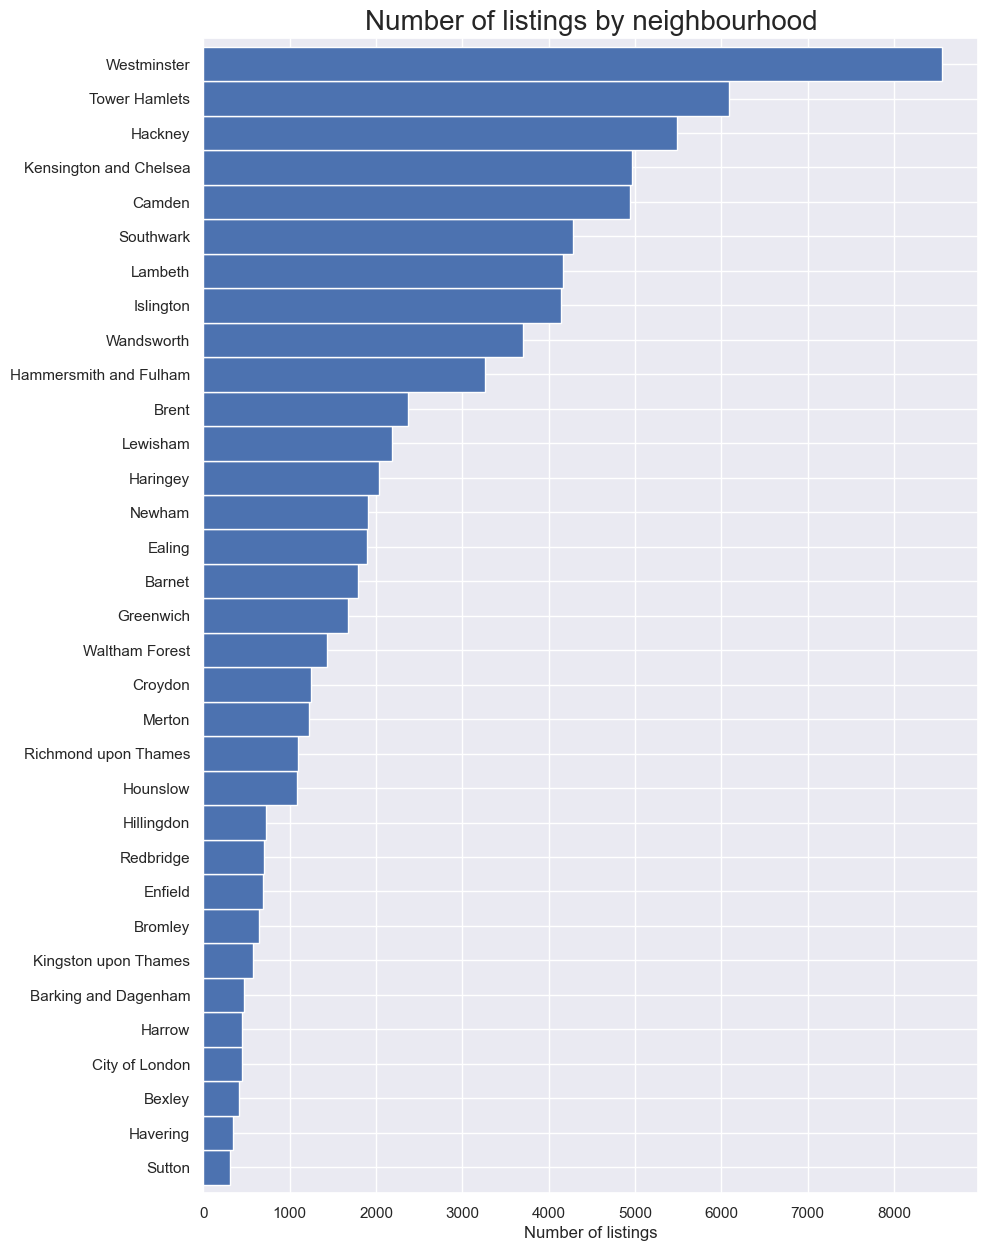

In [53]:
feq=df['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 15), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

<Axes: xlabel='room_type', ylabel='count'>

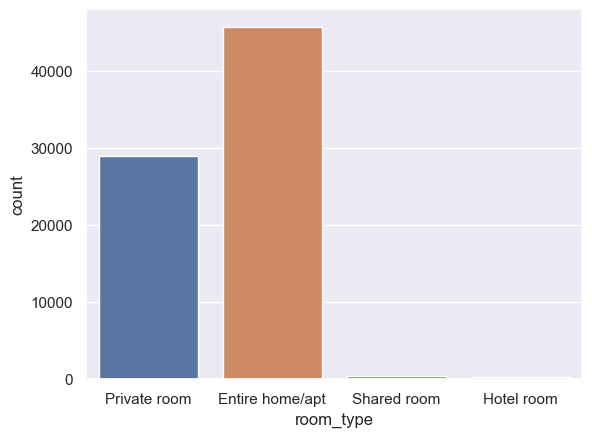

In [54]:
sns.countplot(x="room_type",data=df)

In [55]:
lats2022 = df['latitude'].tolist()
lons2022 = df['longitude'].tolist()
locations = list(zip(lats2022, lons2022))

map1 = folium.Map(location=[51.5074, 0.1278],
                 zoom_start = 11)
FastMarkerCluster(data=locations).add_to(map1)
map1

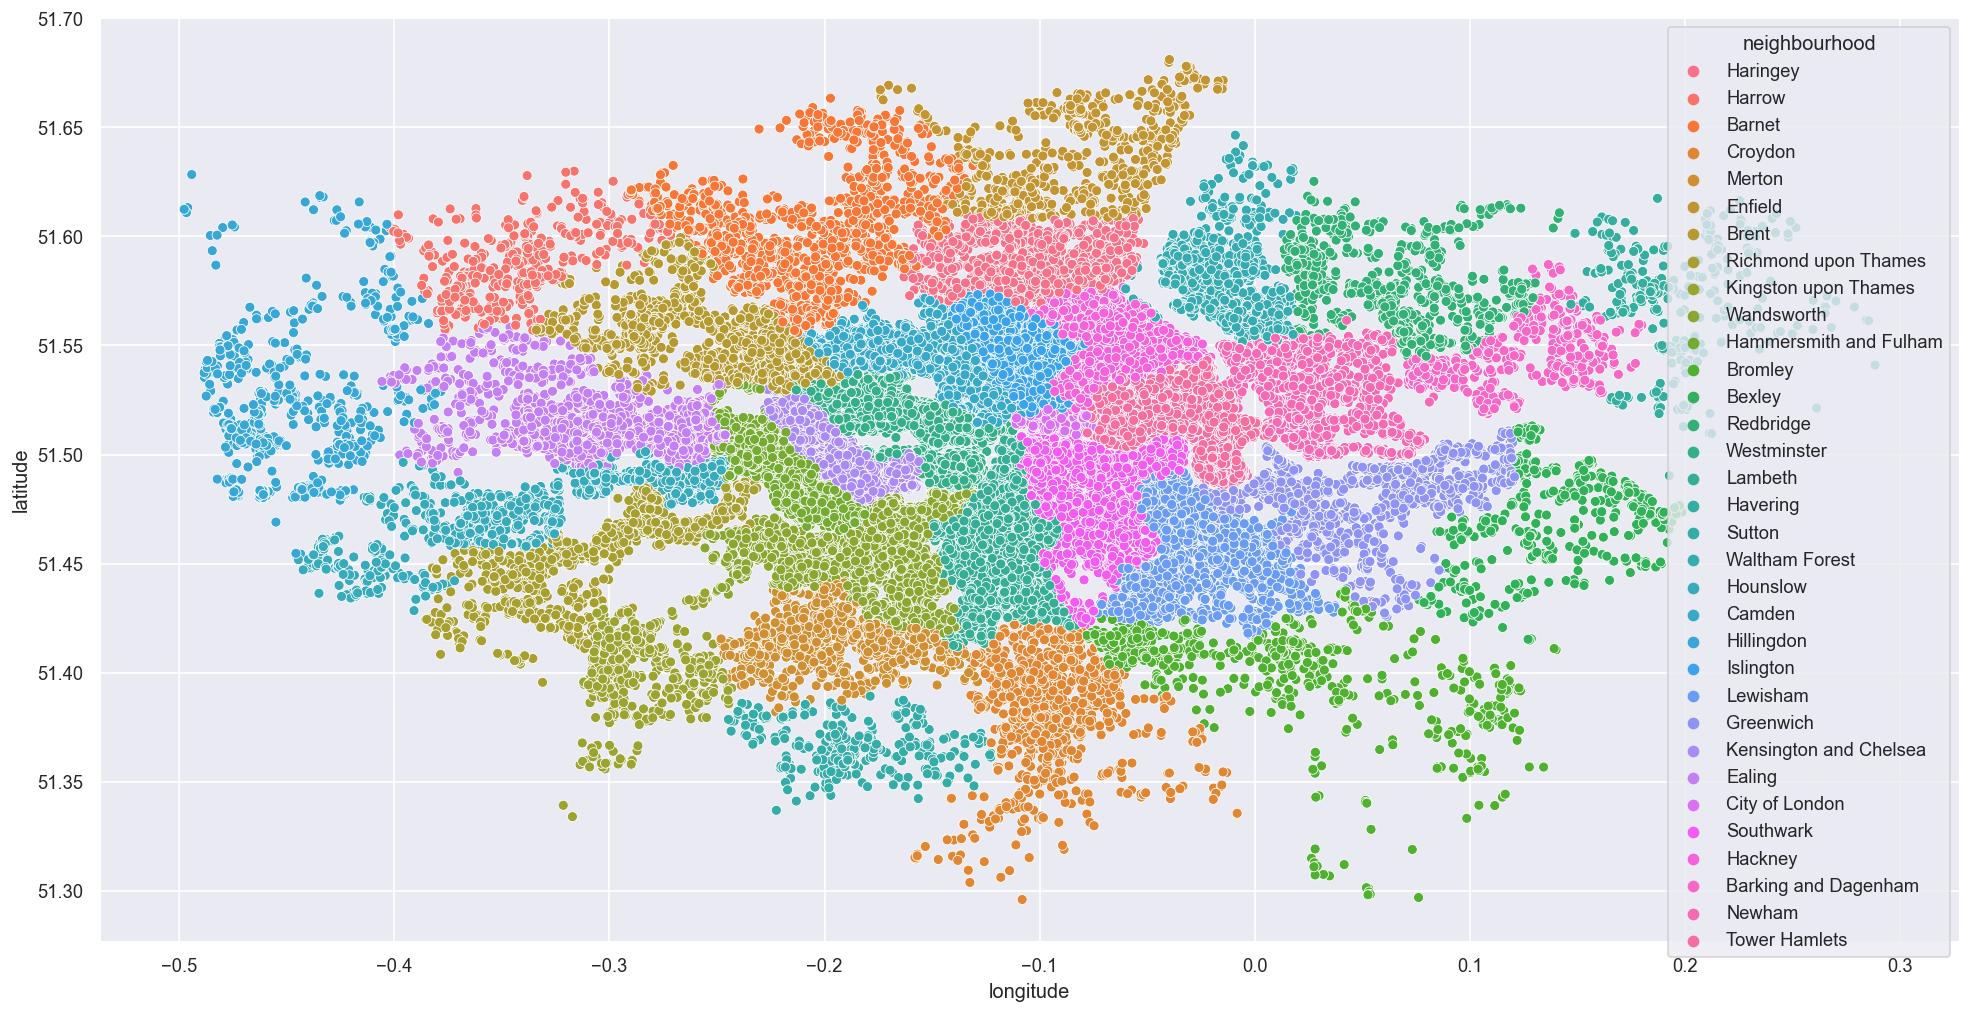

In [61]:
plt.ioff()
plt.figure(figsize=(20, 10), dpi=120)
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood)
plt.ioff()
plt.show()


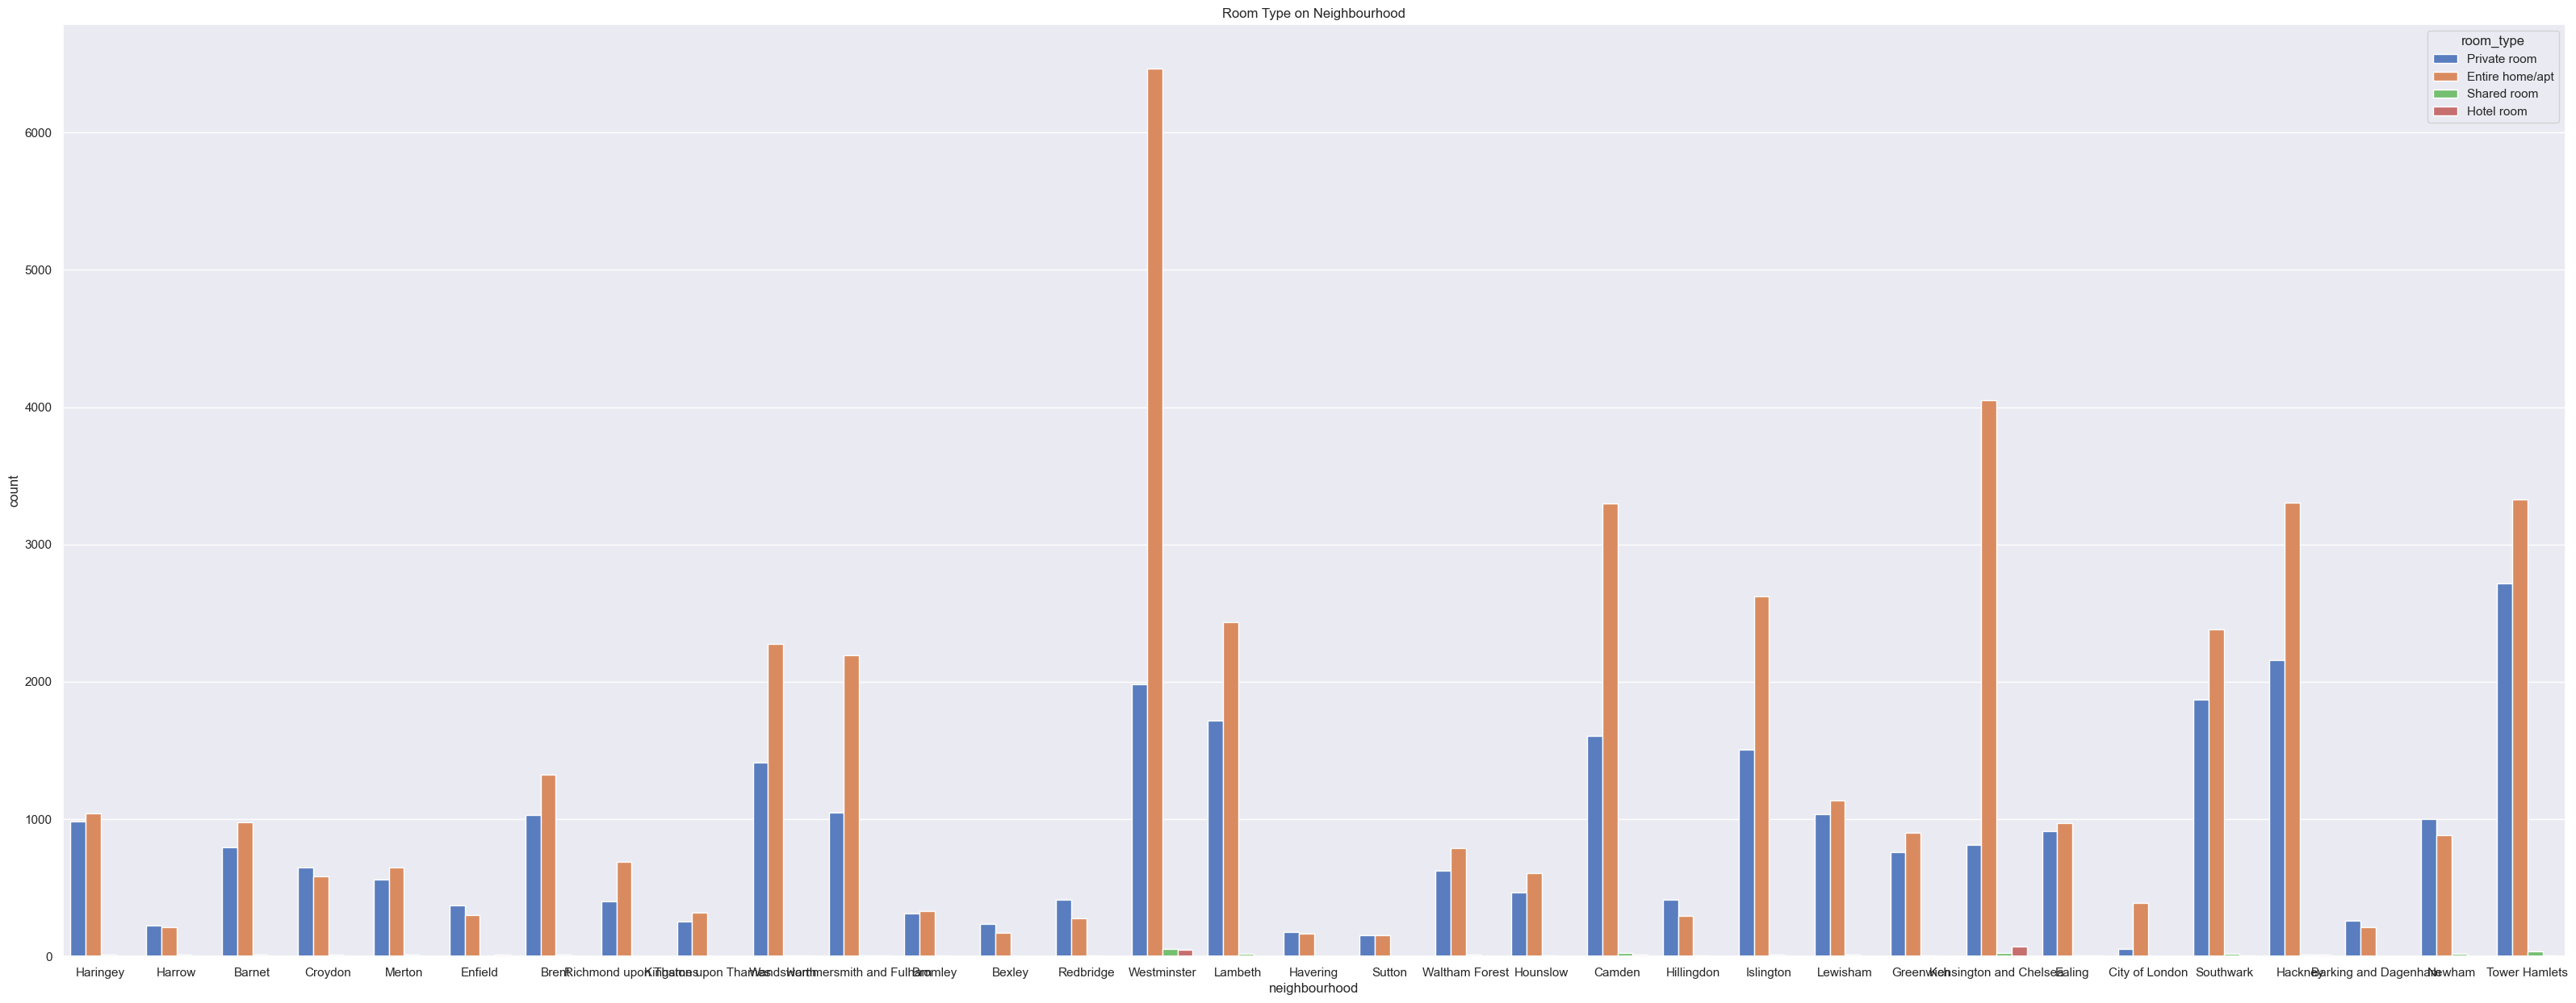

In [64]:
plt.figure(figsize=(40, 15))
plt.title("Room Type on Neighbourhood")
sns.countplot(x=df.neighbourhood, hue=df.room_type, palette="muted")
plt.show()


In [67]:
Westminster = df[df['neighbourhood'] == "Westminster"]
Westminster1= Westminster[Westminster['price'] <= 2000]
Westminster1

id    host_id neighbourhood   latitude  longitude  \
31               31147353   39043909   Westminster  51.514260  -0.162879   
84               27716743  209204643   Westminster  51.532450  -0.178500   
98     673644435283399459  456120364   Westminster  51.515530  -0.158320   
124    786166113397136833   49806364   Westminster  51.530941  -0.209194   
134    826502363832700590    1444493   Westminster  51.486712  -0.145244   
...                   ...        ...           ...        ...        ...   
75158            42858112  341276710   Westminster  51.513510  -0.178640   
75164            42886900  118944192   Westminster  51.518840  -0.159280   
75178             6655854    3471959   Westminster  51.521970  -0.179430   
75197            10509933   54187825   Westminster  51.494050  -0.152950   
75213            35780911  188746931   Westminster  51.512340  -0.181070   

             room_type  price  minimum_nights  number_of_reviews  \
31        Private room     49              20                  1   
84        Private room    150               1                  0   
98     Entire home/apt    149               1                  7   
124       Private room     83              21                  0   
134    Entire home/apt    149               4                  0   
...                ...    ...             ...                ...   
75158  Entire home/apt    129               2                  4   
75164  Entire home/apt    130               3                  2   
75178     Private room     75               1                  7   
75197  Entire home/apt     90               1                  0   
75213  Entire home/apt    220               2                 14   

       reviews_per_month  calculated_host_listings_count  availability_365  \
31                  0.02                               1               238   
84                  0.00                               1               364   
98                  0.95                               7               342   
124                 0.00                               2               179   
134                 0.00                              15               104   
...                  ...                             ...               ...   
75158               0.20                               1               106   
75164               0.06                               5                 0   
75178               0.07                               1                 0   
75197               0.00                               1                 0   
75213               0.31                               1                 0   

       number_of_reviews_ltm  
31                         0  
84                         0  
98                         7  
124                        0  
134                        0  
...                      ...  
75158                      2  
75164                      1  
75178                      0  
75197                      0  
75213                      0  

[8480 rows x 13 columns]

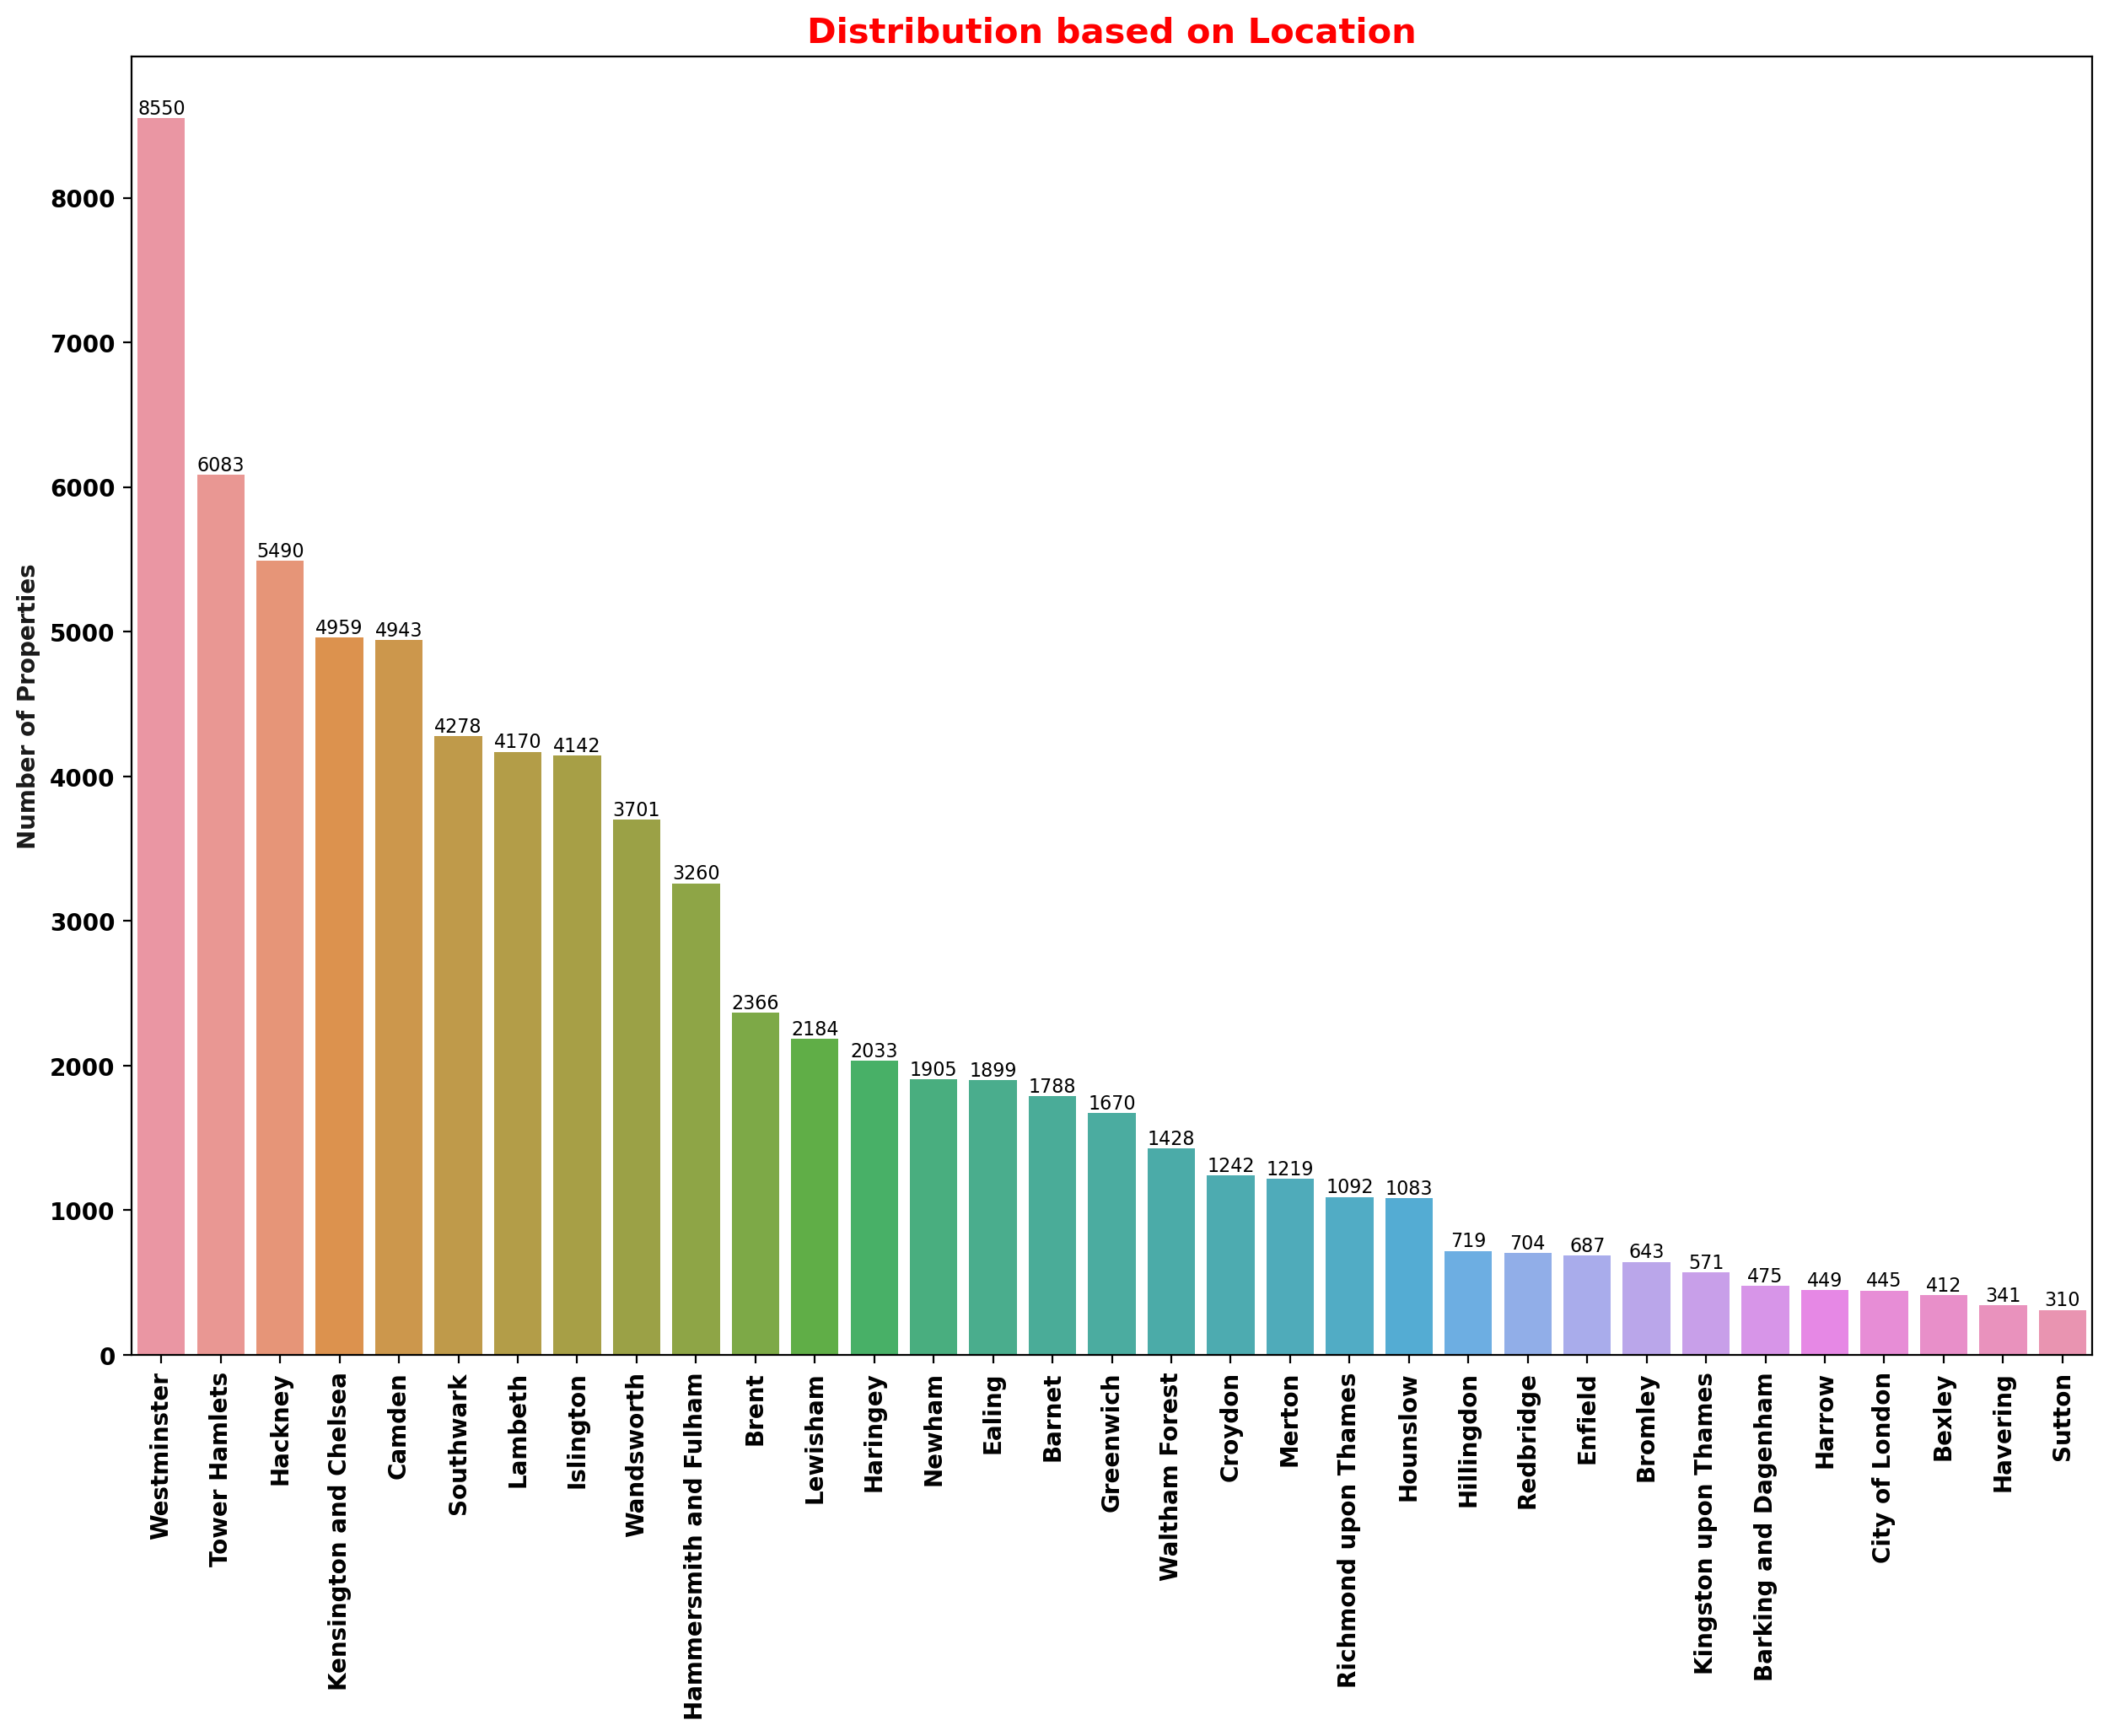

In [71]:
plt.figure(figsize=(15, 10), dpi=200)
plt.style.use('default')

# Calculate the count of properties in each neighborhood
neighbourhood_group_count = df['neighbourhood'].value_counts().reset_index()
neighbourhood_group_count.columns = ['neighbourhood', 'count']

# Plot the barplot
ax = sns.barplot(x="neighbourhood", y="count", data=neighbourhood_group_count)

plt.title("Distribution based on Location", weight="bold", c="red", fontsize=15)
plt.xlabel("", weight="bold", c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Number of Properties", weight="bold", c="k")
plt.yticks(weight="bold")

# Add labels to the bars
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.4, p.get_height()),
                ha='center', va='bottom',
                color='black', size=8)

plt.show()


what is the best neighborhood in availability and price

In [73]:
# here the bar chart will show us which neighborhood has high probability of having many available choices
pr=df.groupby(['neighbourhood'])['availability_365'].mean().sort_values()
pr.plot(kind='bar', figsize=(18,5))

<Axes: xlabel='neighbourhood'>

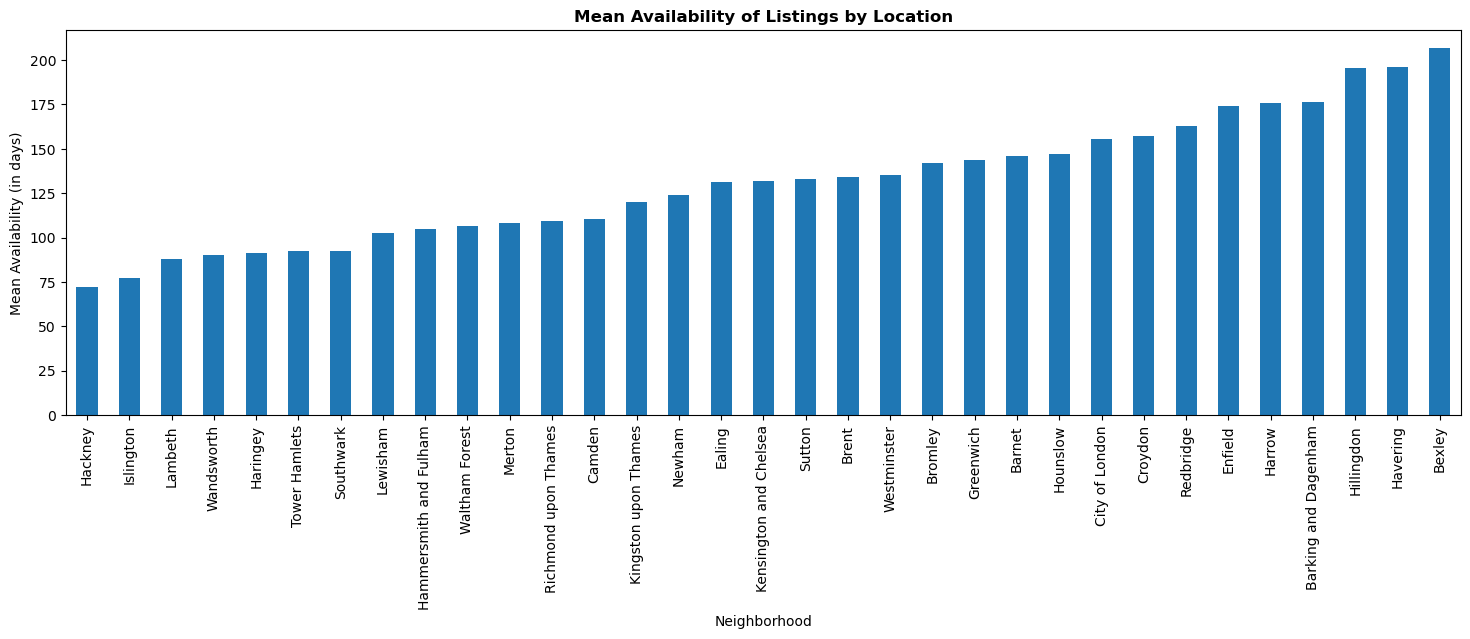

In [79]:
import matplotlib.pyplot as plt

# Calculate the mean availability of listings by neighborhood
mean_availability = df.groupby('neighbourhood')['availability_365'].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(18, 5))
mean_availability.plot(kind='bar')
plt.title('Mean Availability of Listings by Location', weight='bold')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Availability (in days)')
plt.xticks(rotation=90)
plt.show()


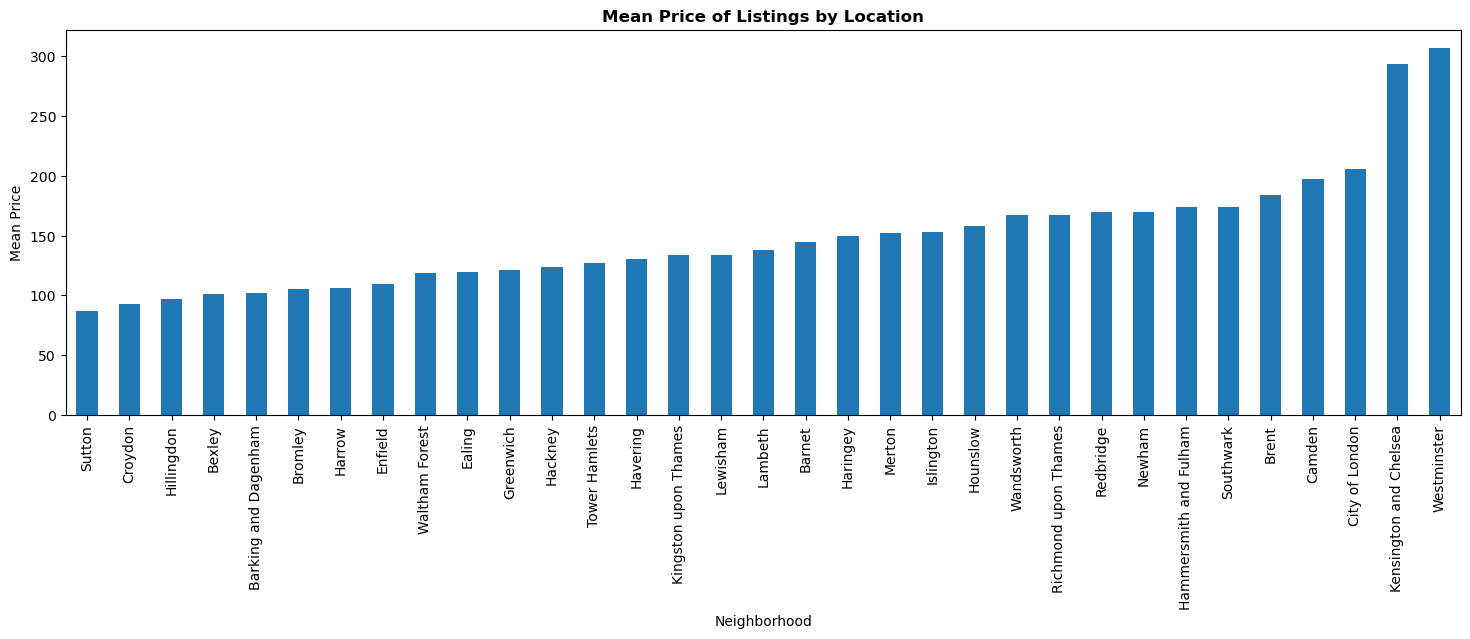

In [80]:
import matplotlib.pyplot as plt

# Calculate the mean price of listings by neighborhood
mean_price = df.groupby('neighbourhood')['price'].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(18, 5))
mean_price.plot(kind='bar')
plt.title('Mean Price of Listings by Location', weight='bold')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.show()


In [81]:
highest_rev1= df[df['number_of_reviews'] >=300]
highest_rev = highest_rev1.sort_values('reviews_per_month',ascending=False)
highest_rev.head(10)

id    host_id   neighbourhood   latitude  longitude  \
33673  47408549  382416289          Camden  51.529980  -0.121930   
10657  43120947   87449409         Hackney  51.547960  -0.057470   
3976   30760930  217727211     Westminster  51.513970  -0.189490   
21031  46233904  371896242  City of London  51.510468  -0.075284   
47134  45006692  172140241     Westminster  51.492020  -0.143950   
8648   47438714  382279067          Camden  51.527750  -0.123740   
14079  19670926  216187763   Tower Hamlets  51.514210  -0.070620   
30025  42081759  333684904  City of London  51.511310  -0.095110   
32874  42081840  333684904  City of London  51.510990  -0.094950   
2803   36861596  193047227     Westminster  51.510870  -0.135590   

             room_type  price  minimum_nights  number_of_reviews  \
33673     Private room    152               1               1067   
10657     Private room    110               1                967   
3976      Private room    119               1               1328   
21031  Entire home/apt    208               1                728   
47134     Private room    416               1                787   
8648      Private room     93               1                507   
14079  Entire home/apt    180               1               1247   
30025  Entire home/apt    173               1                728   
32874  Entire home/apt    197               1                668   
2803   Entire home/apt    144               1                721   

       reviews_per_month  calculated_host_listings_count  availability_365  \
33673              51.05                               6               340   
10657              29.48                               2               351   
3976               26.44                              25               288   
21031              26.31                              27               321   
47134              25.25                               3               317   
8648               23.95                               3               335   
14079              21.30                               7               342   
30025              19.76                               6               317   
32874              18.33                               6               354   
2803               16.89                               2               352   

       number_of_reviews_ltm  
33673                    495  
10657                    564  
3976                     525  
21031                    394  
47134                    220  
8648                     299  
14079                    188  
30025                    205  
32874                     74  
2803                     225

###  Let's Take only the columns that are necessary for futher analysis


In [82]:
airbnb_df = df [['id','host_id','neighbourhood','room_type','price']]
airbnb_df

id    host_id           neighbourhood        room_type  \
0      714569379355913481   39009854                Haringey     Private room   
1      822557738577472503  325629338                  Harrow  Entire home/apt   
2                 4876550   25087384                  Barnet  Entire home/apt   
3      786791705194673775  490795350                 Croydon  Entire home/apt   
4      808038970516277767  495977998                  Barnet  Entire home/apt   
...                   ...        ...                     ...              ...   
75236            13609107   78763244           Tower Hamlets     Private room   
75237            16840434   25942523           Tower Hamlets  Entire home/apt   
75238             9773320   13938346                 Lambeth     Private room   
75239            15460327   56872646                 Hackney  Entire home/apt   
75240            17376717  117429579  Kensington and Chelsea  Entire home/apt   

       price  
0        100  
1        132  
2        120  
3        100  
4         65  
...      ...  
75236     25  
75237    500  
75238     22  
75239     85  
75240    264  

[75241 rows x 5 columns]

In [83]:
airbnb_df.dtypes

id                int64
host_id           int64
neighbourhood    object
room_type        object
price             int64
dtype: object

In [84]:
airbnb_df.isnull().sum()

id               0
host_id          0
neighbourhood    0
room_type        0
price            0
dtype: int64

## Importing new dataset "Review"

In [3]:
review = pd.read_csv('dataset/reviews.csv')
review.head()

listing_id      id        date  reviewer_id reviewer_name  \
0       13913   80770  2010-08-18       177109       Michael   
1       13913  367568  2011-07-11     19835707       Mathias   
2       13913  529579  2011-09-13      1110304       Kristin   
3       13913  595481  2011-10-03      1216358       Camilla   
4       13913  612947  2011-10-09       490840         Jorik   

                                            comments  
0  My girlfriend and I hadn't known Alina before ...  
1  Alina was a really good host. The flat is clea...  
2  Alina is an amazing host. She made me feel rig...  
3  Alina's place is so nice, the room is big and ...  
4  Nice location in Islington area, good for shor...

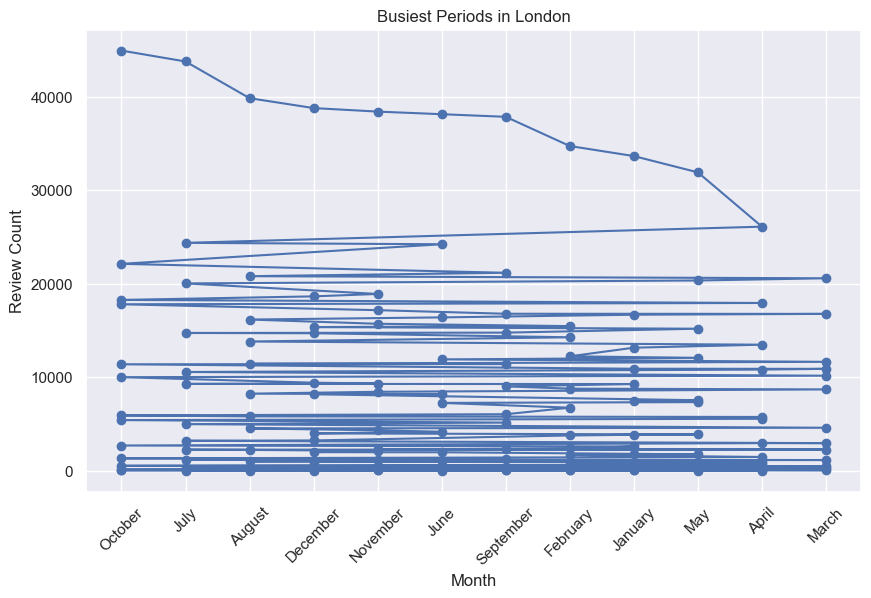

In [4]:
import calendar

# Convert the "date" column to datetime format
review["date"] = pd.to_datetime(review["date"])

# Extract the month and year from the "date" column
review["month"] = review["date"].dt.month
review["year"] = review["date"].dt.year

# Group the data by month and year and calculate the count of reviews
busy_periods = review.groupby(["month", "year"]).size().reset_index(name="review_count")

# Sort the periods by review count in descending order
busy_periods = busy_periods.sort_values("review_count", ascending=False)

# Get the month names corresponding to the month numbers
busy_periods["month_name"] = busy_periods["month"].apply(lambda x: calendar.month_name[x])

# Plot the busiest periods
plt.figure(figsize=(10, 6))
plt.plot(busy_periods["month_name"], busy_periods["review_count"], marker="o")
plt.xlabel("Month")
plt.ylabel("Review Count")
plt.title("Busiest Periods in London")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


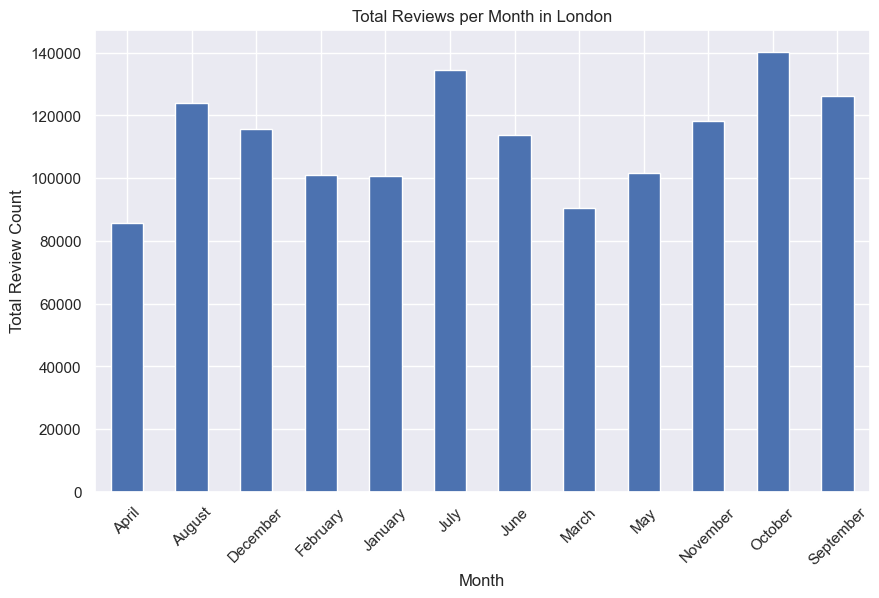

In [9]:
import calendar

# Convert the "date" column to datetime format
review["date"] = pd.to_datetime(review["date"])

# Extract the month and year from the "date" column
review["month"] = review["date"].dt.month
review["year"] = review["date"].dt.year

# Group the data by month and year and calculate the count of reviews
monthly_reviews = review.groupby(["month", "year"]).size().reset_index(name="review_count")

# Get the month names corresponding to the month numbers
monthly_reviews["month_name"] = monthly_reviews["month"].apply(lambda x: calendar.month_name[x])

# Calculate the total review count for each month
total_reviews_per_month = monthly_reviews.groupby("month_name")["review_count"].sum()

# Plot the total review count for each month using a bar graph
plt.figure(figsize=(10, 6))
total_reviews_per_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Total Review Count")
plt.title("Total Reviews per Month in London")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


In [91]:
review.shape

(1352432, 6)

In [92]:
review.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [93]:
review.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         106
dtype: int64

In [94]:
review = review[['listing_id', 'comments']]

In [95]:
#1 Remove rows that do not contain comments.
reviewNAcomments = review[(review.comments.isnull())]
print(reviewNAcomments.shape)

(106, 2)


In [96]:
review = review[~(review.comments.isnull())]

In [97]:
review.isnull().sum()

listing_id    0
comments      0
dtype: int64

In [98]:
review_group = review.groupby('listing_id')
print(review_group)
review = review_group.apply(lambda x: list(x['comments']))

In [99]:
review = review.to_frame('comments')
review

comments
listing_id                                                           
13913               [My girlfriend and I hadn't known Alina before...
15400               [We loved staying at Phillipa's place in Chels...
17402               [Amazing location - great apartment, plenty of...
24328               [The communication with Joe was very easy. We ...
25123               [10,000 times better and cheaper than staying ...
...                                                               ...
843038973630044774         [nice room, central area with subway near]
843203613361079569  [Fantastic host.<br/>Great accommodation cant ...
843405768455690290  [Raffaella’s flat is quite spacious, we were v...
843524996925244561  [Superb stay & very convenient for access to w...
844058888885663384  [I booked Karen's home last minute and my good...

[56548 rows x 1 columns]

In [100]:
review.dtypes

comments    object
dtype: object

In [101]:
review.comments.values[1]

["We loved staying at Phillipa's place in Chelsea. The flat was lovely, and the neighborhood was great. Lots of fun shops, and close to two metro stops. We would love to stay there again!",
 'A comfortable apartment conveniently located near shops, restaurants and tube stations. \r<br/>Philippa is a very helpful and friendly hostess. We would recommend her and her apartment to anyone.\r<br/>Thank you Philippa for an enjoyable holiday.',
 "I really enjoyed my week at Philippa's, the place is ideally situated in Chelsea, and she is a very kind host, I would definitely recommend that you stay there, I will again without any doubt. ",
 'I am a little late reviewing this but it is important to me that I do.  Look, the place is in a great location and the neighbor was very friendly.  The place was perfectly comfortable and Philippa gave a lot of helpful information prior to our arrival in England.\r<br/>\r<br/>However, me and my girlfriend were robbed the second night we were there.  We went

## Merging two dataset

In [102]:
#merging full review +add only speciic columns from airbnb
cleaned_df = pd.merge(left=review, right=airbnb_df, how='left', left_on=review.index, right_on='id')
cleaned_df

comments                  id  \
0      [My girlfriend and I hadn't known Alina before...               13913   
1      [We loved staying at Phillipa's place in Chels...               15400   
2      [Amazing location - great apartment, plenty of...               17402   
3      [The communication with Joe was very easy. We ...               24328   
4      [10,000 times better and cheaper than staying ...               25123   
...                                                  ...                 ...   
56543         [nice room, central area with subway near]  843038973630044774   
56544  [Fantastic host.<br/>Great accommodation cant ...  843203613361079569   
56545  [Raffaella’s flat is quite spacious, we were v...  843405768455690290   
56546  [Superb stay & very convenient for access to w...  843524996925244561   
56547  [I booked Karen's home last minute and my good...  844058888885663384   

         host_id           neighbourhood        room_type  price  
0          54730               Islington     Private room     79  
1          60302  Kensington and Chelsea  Entire home/apt     80  
2          67564             Westminster  Entire home/apt    418  
3          41759              Wandsworth  Entire home/apt    250  
4         103583                  Barnet     Private room     29  
...          ...                     ...              ...    ...  
56543  441856679           Tower Hamlets     Private room     39  
56544    2659258                 Hackney     Private room     37  
56545  494678357  Kensington and Chelsea  Entire home/apt    199  
56546  498382945               Islington     Private room     39  
56547  504732658                  Camden  Entire home/apt    450  

[56548 rows x 6 columns]

In [103]:
cleaned_df = cleaned_df.drop(range(10000,54334)) # as the dataset was too big only used 10000 data and drop others

In [104]:
cleaned_df

comments                  id  \
0      [My girlfriend and I hadn't known Alina before...               13913   
1      [We loved staying at Phillipa's place in Chels...               15400   
2      [Amazing location - great apartment, plenty of...               17402   
3      [The communication with Joe was very easy. We ...               24328   
4      [10,000 times better and cheaper than staying ...               25123   
...                                                  ...                 ...   
56543         [nice room, central area with subway near]  843038973630044774   
56544  [Fantastic host.<br/>Great accommodation cant ...  843203613361079569   
56545  [Raffaella’s flat is quite spacious, we were v...  843405768455690290   
56546  [Superb stay & very convenient for access to w...  843524996925244561   
56547  [I booked Karen's home last minute and my good...  844058888885663384   

         host_id           neighbourhood        room_type  price  
0          54730               Islington     Private room     79  
1          60302  Kensington and Chelsea  Entire home/apt     80  
2          67564             Westminster  Entire home/apt    418  
3          41759              Wandsworth  Entire home/apt    250  
4         103583                  Barnet     Private room     29  
...          ...                     ...              ...    ...  
56543  441856679           Tower Hamlets     Private room     39  
56544    2659258                 Hackney     Private room     37  
56545  494678357  Kensington and Chelsea  Entire home/apt    199  
56546  498382945               Islington     Private room     39  
56547  504732658                  Camden  Entire home/apt    450  

[12214 rows x 6 columns]

In [106]:
#loading the dataset of positive text and negative text file:
p_file = open('dataset/positive.txt', 'r')
positive_list = []
for line in p_file:
    stripped_line = line.strip()
    positive_list.append(stripped_line)
p_file.close()

#loading the dataset for negative text file
n_file = open("dataset/negative.txt", "r")
negative_list = []
for line in n_file:
    stripped_line = line.strip()
    negative_list.append(stripped_line)
n_file.close()

def positive_negative_checker(cleanW):
    #print(cleanW)
    #quit()
#comparing wether the comment is negative or neutral or positive    
    positive_count = 0;
    negative_count = 0;
    for c in cleanW:
        if c in positive_list:
            positive_count = positive_count + 1
            
        elif c in negative_list:
            negative_count = negative_count + 1
    #print("Positive count is : %d \n" %(positive_count)) 
    #print("Negative count is : %d \n" %(negative_count)) 
    #quit()
    if negative_count > positive_count:
        return -1
    elif positive_count > negative_count:
        return 1
    else:
        return 0
    


In [107]:
import nltk

In [108]:
import collections, string
from nltk import word_tokenize
def comment_analyser(sentence_list):
    positive_comment_count = 0
    neutral_comment_count = 0
    negative_comment_count = 0
    for i in range(len(sentence_list)):
        words = word_tokenize(sentence_list[i])
        words = [w.lower() for w in words]
        words = [word for word in words if word.isalnum()]
        cleanW = [ele for ele in words if ele not in stopwords]
        
        comment_value = positive_negative_checker(cleanW)
        if comment_value == 1:
            positive_comment_count += 1
        elif comment_value == 0:
            neutral_comment_count += 1
        elif comment_value == -1:
            negative_comment_count += 1
    
    analyzed_comment = [positive_comment_count, neutral_comment_count, negative_comment_count]
    print(analyzed_comment)
    return analyzed_comment

In [109]:
cleaned_df.insert(1, 'positive_comment', 0)
cleaned_df.insert(2, 'neutral_comment', 0)
cleaned_df.insert(2, 'negative_comment', 0)


In [110]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
count = 0
checking_value = 0
for i in range(len(cleaned_df)):
    checking_value = []
    checking_value = comment_analyser(cleaned_df.iloc[i,0])
    cleaned_df.iloc[i, 1] = checking_value[0]
    cleaned_df.iloc[i, 2] = checking_value[1]
    cleaned_df.iloc[i, 3] = checking_value[2]
    print(i+1)



[39, 2, 0]
1
[85, 6, 1]
2
[45, 5, 4]
3
[83, 9, 4]
4
[124, 5, 0]
5
[16, 2, 1]
6
[96, 3, 0]
7
[502, 83, 17]
8
[1, 0, 0]
9
[15, 1, 1]
10
[9, 1, 0]
11
[1, 0, 0]
12
[80, 4, 0]
13
[17, 3, 1]
14
[66, 3, 2]
15
[105, 3, 2]
16
[2, 0, 0]
17
[472, 44, 14]
18
[196, 28, 3]
19
[114, 9, 2]
20
[1, 1, 0]
21
[93, 5, 4]
22
[208, 11, 6]
23
[409, 15, 3]
24
[88, 9, 2]
25
[109, 19, 4]
26
[112, 8, 1]
27
[2, 0, 0]
28
[84, 8, 1]
29
[66, 10, 2]
30
[143, 9, 14]
31
[65, 11, 3]
32
[78, 18, 7]
33
[22, 5, 2]
34
[12, 1, 0]
35
[2, 0, 0]
36
[64, 10, 2]
37
[136, 17, 4]
38
[32, 2, 0]
39
[70, 10, 2]
40
[122, 18, 3]
41
[57, 9, 4]
42
[2, 0, 0]
43
[57, 1, 0]
44
[153, 7, 1]
45
[11, 2, 0]
46
[139, 9, 3]
47
[82, 7, 1]
48
[10, 0, 0]
49
[15, 1, 1]
50
[197, 11, 5]
51
[177, 13, 3]
52
[57, 3, 4]
53
[58, 2, 0]
54
[339, 39, 6]
55
[108, 12, 6]
56
[438, 41, 11]
57
[120, 23, 7]
58
[53, 12, 6]
59
[1, 1, 0]
60
[113, 6, 1]
61
[384, 46, 18]
62
[8, 1, 0]
63
[35, 11, 5]
64
[256, 6, 5]
65
[183, 21, 12]
66
[33, 3, 2]
67
[152, 12, 4]
68
[21, 2, 0]


[84, 3, 3]
538
[74, 12, 1]
539
[28, 2, 0]
540
[81, 3, 0]
541
[270, 10, 4]
542
[38, 6, 1]
543
[72, 2, 4]
544
[55, 3, 1]
545
[91, 9, 3]
546
[19, 2, 0]
547
[36, 11, 3]
548
[11, 1, 0]
549
[23, 2, 0]
550
[198, 20, 11]
551
[11, 1, 0]
552
[23, 1, 0]
553
[2, 0, 0]
554
[19, 4, 1]
555
[53, 1, 0]
556
[6, 2, 0]
557
[4, 0, 0]
558
[9, 1, 0]
559
[270, 25, 7]
560
[20, 2, 1]
561
[4, 0, 0]
562
[25, 2, 1]
563
[86, 22, 10]
564
[4, 3, 1]
565
[204, 37, 16]
566
[105, 7, 5]
567
[44, 3, 2]
568
[21, 0, 1]
569
[85, 4, 0]
570
[86, 8, 4]
571
[50, 7, 0]
572
[12, 2, 0]
573
[18, 0, 0]
574
[125, 22, 13]
575
[343, 20, 8]
576
[11, 0, 0]
577
[12, 0, 0]
578
[263, 28, 10]
579
[22, 4, 0]
580
[146, 9, 1]
581
[48, 4, 2]
582
[61, 4, 1]
583
[6, 1, 0]
584
[59, 3, 1]
585
[8, 1, 0]
586
[145, 12, 2]
587
[8, 1, 1]
588
[9, 1, 0]
589
[78, 7, 3]
590
[16, 3, 0]
591
[6, 0, 0]
592
[37, 1, 1]
593
[110, 37, 9]
594
[52, 2, 3]
595
[25, 4, 1]
596
[6, 2, 0]
597
[3, 0, 0]
598
[70, 7, 0]
599
[51, 11, 6]
600
[8, 1, 0]
601
[33, 11, 1]
602
[461, 39,

[45, 1, 0]
1065
[4, 0, 0]
1066
[37, 2, 1]
1067
[30, 7, 2]
1068
[6, 6, 0]
1069
[161, 20, 2]
1070
[7, 0, 0]
1071
[87, 9, 1]
1072
[331, 23, 6]
1073
[161, 26, 7]
1074
[15, 2, 0]
1075
[33, 0, 0]
1076
[94, 11, 6]
1077
[11, 1, 0]
1078
[39, 7, 2]
1079
[4, 0, 0]
1080
[21, 2, 1]
1081
[30, 4, 1]
1082
[13, 0, 0]
1083
[31, 1, 0]
1084
[28, 1, 0]
1085
[183, 5, 3]
1086
[9, 1, 0]
1087
[16, 3, 0]
1088
[19, 0, 1]
1089
[51, 2, 0]
1090
[227, 12, 3]
1091
[52, 3, 0]
1092
[102, 4, 2]
1093
[19, 1, 2]
1094
[32, 5, 1]
1095
[53, 4, 1]
1096
[35, 0, 0]
1097
[61, 6, 0]
1098
[80, 5, 2]
1099
[45, 3, 0]
1100
[7, 2, 0]
1101
[86, 9, 4]
1102
[29, 5, 1]
1103
[82, 10, 0]
1104
[142, 12, 14]
1105
[39, 1, 0]
1106
[229, 25, 14]
1107
[98, 7, 2]
1108
[112, 7, 1]
1109
[103, 6, 1]
1110
[10, 3, 0]
1111
[6, 0, 0]
1112
[34, 4, 0]
1113
[45, 3, 0]
1114
[50, 2, 1]
1115
[25, 3, 0]
1116
[4, 0, 0]
1117
[60, 3, 4]
1118
[1, 0, 0]
1119
[8, 1, 0]
1120
[108, 17, 7]
1121
[3, 1, 0]
1122
[3, 0, 0]
1123
[124, 15, 6]
1124
[58, 2, 0]
1125
[0, 1, 0]
11

[45, 13, 2]
1576
[211, 11, 4]
1577
[2, 0, 0]
1578
[1, 2, 0]
1579
[18, 2, 1]
1580
[1, 2, 2]
1581
[5, 0, 0]
1582
[8, 0, 0]
1583
[11, 0, 0]
1584
[38, 2, 0]
1585
[29, 2, 0]
1586
[28, 14, 5]
1587
[226, 22, 10]
1588
[338, 19, 8]
1589
[20, 2, 0]
1590
[19, 2, 0]
1591
[53, 8, 0]
1592
[68, 21, 10]
1593
[32, 2, 1]
1594
[76, 4, 3]
1595
[19, 3, 0]
1596
[14, 2, 0]
1597
[3, 0, 0]
1598
[17, 1, 1]
1599
[55, 9, 3]
1600
[3, 1, 0]
1601
[6, 2, 0]
1602
[11, 0, 0]
1603
[2, 0, 0]
1604
[77, 21, 4]
1605
[23, 0, 1]
1606
[62, 5, 1]
1607
[7, 2, 0]
1608
[99, 16, 8]
1609
[3, 0, 0]
1610
[38, 8, 2]
1611
[33, 5, 0]
1612
[62, 7, 2]
1613
[74, 8, 2]
1614
[132, 19, 6]
1615
[19, 0, 0]
1616
[39, 5, 1]
1617
[27, 6, 2]
1618
[103, 7, 0]
1619
[65, 3, 0]
1620
[22, 3, 1]
1621
[24, 3, 0]
1622
[1, 0, 0]
1623
[19, 2, 1]
1624
[69, 13, 0]
1625
[16, 7, 1]
1626
[18, 2, 0]
1627
[29, 2, 0]
1628
[12, 2, 0]
1629
[62, 1, 1]
1630
[301, 35, 4]
1631
[12, 1, 0]
1632
[2, 1, 0]
1633
[17, 2, 1]
1634
[2, 1, 0]
1635
[2, 0, 0]
1636
[2, 3, 0]
1637
[5, 0

[81, 20, 3]
2086
[85, 4, 6]
2087
[11, 0, 0]
2088
[126, 13, 5]
2089
[7, 0, 0]
2090
[87, 4, 1]
2091
[39, 5, 3]
2092
[25, 3, 1]
2093
[1, 0, 0]
2094
[1, 0, 0]
2095
[51, 4, 0]
2096
[33, 3, 1]
2097
[146, 25, 9]
2098
[26, 1, 0]
2099
[49, 4, 2]
2100
[5, 0, 0]
2101
[53, 2, 0]
2102
[5, 0, 0]
2103
[80, 11, 4]
2104
[89, 10, 1]
2105
[15, 3, 1]
2106
[60, 4, 0]
2107
[1, 0, 0]
2108
[17, 1, 1]
2109
[54, 0, 1]
2110
[15, 2, 0]
2111
[18, 5, 0]
2112
[85, 9, 3]
2113
[11, 2, 0]
2114
[13, 1, 1]
2115
[8, 1, 0]
2116
[18, 0, 2]
2117
[123, 13, 2]
2118
[16, 2, 0]
2119
[20, 5, 0]
2120
[2, 0, 0]
2121
[21, 2, 0]
2122
[26, 0, 2]
2123
[198, 29, 9]
2124
[17, 1, 2]
2125
[33, 0, 0]
2126
[173, 36, 8]
2127
[101, 8, 5]
2128
[32, 0, 1]
2129
[16, 3, 0]
2130
[2, 1, 0]
2131
[11, 1, 0]
2132
[59, 3, 1]
2133
[3, 1, 0]
2134
[78, 0, 3]
2135
[32, 3, 1]
2136
[77, 4, 1]
2137
[6, 0, 0]
2138
[219, 21, 3]
2139
[2, 0, 0]
2140
[4, 0, 0]
2141
[27, 3, 0]
2142
[1, 1, 0]
2143
[3, 0, 0]
2144
[13, 1, 0]
2145
[19, 1, 0]
2146
[9, 3, 3]
2147
[6, 0, 0

[82, 10, 5]
2601
[37, 1, 0]
2602
[170, 22, 10]
2603
[70, 18, 5]
2604
[13, 1, 0]
2605
[3, 0, 0]
2606
[10, 0, 0]
2607
[1, 0, 0]
2608
[11, 2, 0]
2609
[16, 2, 0]
2610
[105, 15, 5]
2611
[1, 2, 1]
2612
[37, 2, 0]
2613
[84, 14, 3]
2614
[14, 2, 0]
2615
[202, 12, 6]
2616
[3, 3, 0]
2617
[9, 5, 0]
2618
[14, 0, 0]
2619
[2, 0, 0]
2620
[4, 0, 0]
2621
[165, 8, 4]
2622
[7, 2, 0]
2623
[162, 15, 0]
2624
[7, 0, 0]
2625
[3, 1, 1]
2626
[190, 25, 10]
2627
[2, 0, 0]
2628
[92, 5, 2]
2629
[112, 8, 3]
2630
[65, 18, 2]
2631
[41, 8, 3]
2632
[41, 0, 0]
2633
[164, 21, 9]
2634
[22, 2, 0]
2635
[3, 0, 0]
2636
[2, 0, 0]
2637
[12, 0, 0]
2638
[20, 5, 1]
2639
[30, 3, 1]
2640
[12, 1, 2]
2641
[33, 3, 0]
2642
[54, 8, 2]
2643
[8, 1, 0]
2644
[12, 1, 0]
2645
[54, 6, 2]
2646
[7, 1, 1]
2647
[47, 6, 3]
2648
[24, 0, 0]
2649
[17, 3, 0]
2650
[1, 0, 0]
2651
[3, 1, 0]
2652
[20, 4, 0]
2653
[250, 37, 14]
2654
[34, 3, 1]
2655
[16, 3, 0]
2656
[29, 1, 0]
2657
[4, 0, 0]
2658
[60, 8, 1]
2659
[13, 0, 0]
2660
[1, 1, 0]
2661
[2, 0, 0]
2662
[14, 

[85, 12, 3]
3117
[2, 0, 0]
3118
[144, 8, 5]
3119
[30, 1, 1]
3120
[20, 2, 0]
3121
[2, 0, 0]
3122
[27, 1, 1]
3123
[37, 2, 1]
3124
[96, 6, 1]
3125
[8, 1, 0]
3126
[23, 0, 0]
3127
[62, 3, 0]
3128
[11, 2, 0]
3129
[4, 0, 0]
3130
[19, 9, 6]
3131
[0, 1, 0]
3132
[9, 0, 0]
3133
[59, 2, 1]
3134
[5, 1, 0]
3135
[39, 1, 0]
3136
[435, 85, 20]
3137
[1, 0, 0]
3138
[1, 0, 0]
3139
[10, 0, 0]
3140
[0, 1, 0]
3141
[206, 26, 9]
3142
[17, 4, 1]
3143
[11, 3, 0]
3144
[8, 0, 0]
3145
[5, 1, 0]
3146
[172, 45, 4]
3147
[19, 0, 0]
3148
[24, 4, 1]
3149
[37, 2, 0]
3150
[8, 2, 0]
3151
[10, 0, 0]
3152
[43, 8, 1]
3153
[129, 11, 6]
3154
[85, 5, 1]
3155
[3, 2, 0]
3156
[12, 8, 0]
3157
[5, 4, 0]
3158
[21, 0, 2]
3159
[18, 7, 1]
3160
[18, 3, 3]
3161
[15, 0, 0]
3162
[74, 1, 0]
3163
[1, 0, 0]
3164
[5, 0, 0]
3165
[22, 7, 4]
3166
[435, 48, 8]
3167
[469, 61, 25]
3168
[55, 5, 1]
3169
[41, 4, 2]
3170
[58, 12, 2]
3171
[3, 0, 0]
3172
[3, 0, 0]
3173
[61, 6, 1]
3174
[10, 1, 0]
3175
[18, 5, 0]
3176
[12, 3, 0]
3177
[3, 1, 0]
3178
[18, 3, 1]


[36, 2, 2]
3631
[54, 5, 1]
3632
[33, 0, 0]
3633
[5, 0, 0]
3634
[36, 3, 1]
3635
[4, 0, 0]
3636
[2, 0, 0]
3637
[92, 19, 3]
3638
[1, 0, 0]
3639
[9, 0, 0]
3640
[5, 0, 0]
3641
[12, 6, 1]
3642
[52, 2, 0]
3643
[12, 1, 1]
3644
[99, 8, 2]
3645
[25, 2, 0]
3646
[103, 5, 2]
3647
[2, 0, 1]
3648
[46, 6, 2]
3649
[37, 8, 0]
3650
[2, 0, 0]
3651
[3, 0, 0]
3652
[18, 7, 2]
3653
[3, 1, 0]
3654
[20, 3, 1]
3655
[160, 13, 9]
3656
[10, 0, 0]
3657
[29, 3, 1]
3658
[2, 0, 0]
3659
[1, 1, 0]
3660
[3, 0, 0]
3661
[12, 1, 0]
3662
[128, 5, 2]
3663
[7, 13, 0]
3664
[172, 13, 12]
3665
[25, 0, 0]
3666
[0, 1, 0]
3667
[59, 5, 2]
3668
[64, 6, 1]
3669
[85, 6, 2]
3670
[22, 4, 1]
3671
[150, 22, 10]
3672
[75, 4, 0]
3673
[16, 2, 1]
3674
[36, 1, 3]
3675
[214, 21, 4]
3676
[63, 6, 3]
3677
[400, 20, 2]
3678
[63, 3, 3]
3679
[5, 0, 0]
3680
[34, 7, 1]
3681
[1, 0, 0]
3682
[6, 0, 0]
3683
[9, 0, 0]
3684
[34, 4, 1]
3685
[11, 3, 0]
3686
[30, 1, 0]
3687
[1, 0, 0]
3688
[3, 2, 0]
3689
[11, 1, 0]
3690
[1, 0, 0]
3691
[119, 20, 1]
3692
[2, 0, 0]
36

[100, 5, 3]
4153
[13, 2, 0]
4154
[11, 1, 1]
4155
[2, 0, 0]
4156
[8, 3, 0]
4157
[2, 1, 0]
4158
[1, 0, 0]
4159
[7, 0, 0]
4160
[1, 0, 0]
4161
[30, 4, 0]
4162
[19, 6, 0]
4163
[11, 2, 0]
4164
[10, 0, 0]
4165
[123, 6, 4]
4166
[3, 0, 0]
4167
[2, 0, 1]
4168
[62, 3, 0]
4169
[4, 0, 0]
4170
[27, 1, 0]
4171
[2, 0, 0]
4172
[22, 3, 0]
4173
[59, 17, 0]
4174
[65, 1, 1]
4175
[1, 0, 0]
4176
[84, 6, 1]
4177
[2, 0, 0]
4178
[1, 0, 0]
4179
[1, 0, 0]
4180
[7, 0, 0]
4181
[6, 1, 0]
4182
[59, 2, 3]
4183
[22, 0, 0]
4184
[4, 0, 0]
4185
[62, 9, 1]
4186
[9, 0, 1]
4187
[2, 3, 0]
4188
[82, 10, 4]
4189
[10, 3, 0]
4190
[1, 0, 0]
4191
[122, 6, 6]
4192
[36, 3, 0]
4193
[108, 11, 9]
4194
[159, 9, 7]
4195
[10, 0, 0]
4196
[2, 0, 0]
4197
[2, 0, 0]
4198
[84, 2, 2]
4199
[122, 35, 10]
4200
[47, 4, 1]
4201
[6, 0, 0]
4202
[11, 1, 0]
4203
[9, 2, 0]
4204
[12, 0, 0]
4205
[4, 2, 1]
4206
[20, 2, 0]
4207
[16, 1, 0]
4208
[16, 3, 2]
4209
[2, 0, 0]
4210
[70, 3, 0]
4211
[2, 0, 0]
4212
[13, 2, 0]
4213
[2, 1, 1]
4214
[81, 5, 0]
4215
[1, 0, 0]

[23, 2, 1]
4678
[3, 3, 0]
4679
[2, 1, 1]
4680
[31, 7, 2]
4681
[1, 0, 0]
4682
[5, 0, 0]
4683
[18, 2, 0]
4684
[2, 0, 0]
4685
[1, 0, 0]
4686
[8, 1, 0]
4687
[5, 1, 0]
4688
[24, 8, 0]
4689
[20, 0, 0]
4690
[1, 0, 0]
4691
[32, 1, 0]
4692
[46, 8, 0]
4693
[0, 1, 0]
4694
[1, 0, 0]
4695
[0, 1, 0]
4696
[0, 2, 0]
4697
[1, 0, 0]
4698
[1, 0, 0]
4699
[2, 0, 0]
4700
[0, 1, 1]
4701
[8, 2, 0]
4702
[15, 7, 5]
4703
[1, 0, 0]
4704
[2, 0, 0]
4705
[2, 0, 0]
4706
[5, 0, 0]
4707
[212, 7, 4]
4708
[134, 18, 11]
4709
[5, 0, 0]
4710
[19, 6, 2]
4711
[12, 2, 0]
4712
[5, 3, 1]
4713
[10, 1, 0]
4714
[110, 9, 2]
4715
[5, 0, 0]
4716
[35, 8, 3]
4717
[6, 1, 1]
4718
[0, 0, 1]
4719
[63, 5, 1]
4720
[1, 0, 0]
4721
[1, 0, 0]
4722
[2, 0, 0]
4723
[1, 0, 0]
4724
[2, 0, 0]
4725
[4, 2, 1]
4726
[2, 0, 0]
4727
[20, 7, 0]
4728
[149, 16, 5]
4729
[30, 0, 0]
4730
[2, 0, 0]
4731
[1, 0, 0]
4732
[5, 0, 0]
4733
[35, 5, 1]
4734
[2, 0, 1]
4735
[4, 0, 0]
4736
[85, 12, 6]
4737
[0, 3, 0]
4738
[3, 1, 0]
4739
[16, 0, 0]
4740
[1, 0, 0]
4741
[3, 0, 2]


[195, 19, 10]
5206
[169, 21, 4]
5207
[1, 0, 0]
5208
[4, 4, 0]
5209
[0, 1, 0]
5210
[199, 29, 11]
5211
[7, 0, 0]
5212
[5, 0, 0]
5213
[20, 0, 0]
5214
[13, 0, 0]
5215
[2, 0, 0]
5216
[1, 0, 0]
5217
[33, 6, 0]
5218
[2, 0, 0]
5219
[2, 0, 2]
5220
[151, 28, 10]
5221
[41, 3, 1]
5222
[14, 3, 0]
5223
[2, 0, 0]
5224
[2, 0, 0]
5225
[4, 0, 0]
5226
[1, 0, 0]
5227
[15, 2, 0]
5228
[1, 0, 0]
5229
[2, 0, 0]
5230
[78, 9, 3]
5231
[1, 0, 0]
5232
[15, 1, 0]
5233
[8, 1, 0]
5234
[66, 2, 1]
5235
[4, 1, 0]
5236
[2, 0, 0]
5237
[2, 0, 0]
5238
[1, 0, 0]
5239
[4, 0, 0]
5240
[26, 1, 0]
5241
[65, 7, 5]
5242
[60, 8, 1]
5243
[0, 1, 0]
5244
[56, 10, 1]
5245
[4, 0, 0]
5246
[101, 16, 3]
5247
[32, 1, 0]
5248
[1, 0, 0]
5249
[100, 18, 1]
5250
[64, 4, 1]
5251
[4, 0, 0]
5252
[48, 5, 4]
5253
[9, 4, 0]
5254
[22, 9, 1]
5255
[3, 0, 0]
5256
[3, 0, 1]
5257
[1, 0, 0]
5258
[16, 4, 1]
5259
[6, 0, 0]
5260
[4, 0, 0]
5261
[42, 3, 3]
5262
[65, 13, 4]
5263
[11, 0, 0]
5264
[2, 0, 0]
5265
[7, 5, 1]
5266
[2, 0, 0]
5267
[1, 0, 0]
5268
[21, 1, 0]


[16, 4, 1]
5727
[101, 7, 1]
5728
[3, 3, 0]
5729
[1, 1, 0]
5730
[0, 1, 0]
5731
[1, 2, 0]
5732
[17, 8, 6]
5733
[1, 1, 0]
5734
[62, 23, 3]
5735
[71, 22, 2]
5736
[1, 0, 0]
5737
[26, 2, 0]
5738
[20, 0, 0]
5739
[3, 0, 0]
5740
[1, 1, 0]
5741
[6, 1, 1]
5742
[1, 0, 0]
5743
[2, 0, 0]
5744
[1, 0, 0]
5745
[2, 0, 0]
5746
[4, 1, 0]
5747
[2, 0, 0]
5748
[64, 5, 2]
5749
[86, 2, 3]
5750
[59, 0, 0]
5751
[2, 0, 0]
5752
[43, 1, 0]
5753
[1, 0, 0]
5754
[1, 0, 0]
5755
[6, 0, 2]
5756
[4, 1, 0]
5757
[11, 1, 0]
5758
[1, 0, 0]
5759
[2, 0, 0]
5760
[10, 2, 0]
5761
[7, 2, 0]
5762
[12, 1, 0]
5763
[43, 2, 3]
5764
[7, 4, 1]
5765
[24, 1, 1]
5766
[1, 0, 0]
5767
[7, 0, 0]
5768
[1, 0, 0]
5769
[3, 1, 0]
5770
[49, 10, 3]
5771
[1, 0, 0]
5772
[4, 1, 1]
5773
[11, 2, 0]
5774
[1, 1, 0]
5775
[12, 2, 0]
5776
[162, 8, 1]
5777
[8, 1, 0]
5778
[3, 0, 0]
5779
[1, 0, 0]
5780
[11, 0, 2]
5781
[1, 2, 0]
5782
[4, 0, 0]
5783
[9, 2, 0]
5784
[3, 0, 0]
5785
[31, 3, 2]
5786
[2, 1, 0]
5787
[6, 0, 0]
5788
[20, 6, 0]
5789
[1, 0, 0]
5790
[196, 9, 1]


[10, 2, 3]
6253
[5, 0, 0]
6254
[170, 18, 3]
6255
[43, 5, 5]
6256
[5, 2, 0]
6257
[13, 1, 2]
6258
[22, 2, 0]
6259
[23, 1, 2]
6260
[49, 4, 3]
6261
[1, 1, 0]
6262
[43, 7, 4]
6263
[3, 1, 0]
6264
[264, 31, 9]
6265
[6, 1, 0]
6266
[36, 9, 0]
6267
[4, 0, 0]
6268
[100, 3, 1]
6269
[0, 1, 0]
6270
[19, 2, 0]
6271
[70, 12, 3]
6272
[8, 0, 0]
6273
[88, 6, 1]
6274
[3, 1, 0]
6275
[4, 0, 0]
6276
[4, 2, 0]
6277
[14, 2, 0]
6278
[2, 0, 0]
6279
[18, 0, 0]
6280
[33, 6, 1]
6281
[1, 0, 0]
6282
[0, 1, 0]
6283
[1, 1, 0]
6284
[36, 2, 0]
6285
[1, 1, 0]
6286
[0, 1, 0]
6287
[6, 0, 0]
6288
[19, 1, 0]
6289
[2, 2, 0]
6290
[8, 0, 0]
6291
[18, 0, 0]
6292
[21, 2, 0]
6293
[0, 1, 0]
6294
[8, 0, 0]
6295
[225, 10, 4]
6296
[42, 5, 1]
6297
[22, 4, 1]
6298
[80, 10, 1]
6299
[3, 1, 0]
6300
[0, 1, 0]
6301
[8, 0, 0]
6302
[49, 4, 0]
6303
[14, 4, 0]
6304
[36, 4, 2]
6305
[4, 1, 0]
6306
[0, 1, 0]
6307
[10, 1, 0]
6308
[0, 1, 0]
6309
[8, 2, 0]
6310
[5, 1, 0]
6311
[4, 1, 0]
6312
[19, 2, 0]
6313
[1, 0, 0]
6314
[32, 6, 2]
6315
[24, 1, 1]
6316

[33, 3, 2]
6783
[172, 18, 7]
6784
[4, 1, 0]
6785
[3, 1, 0]
6786
[16, 1, 0]
6787
[59, 5, 1]
6788
[1, 0, 0]
6789
[5, 1, 0]
6790
[137, 5, 1]
6791
[47, 2, 2]
6792
[0, 1, 0]
6793
[21, 4, 0]
6794
[2, 0, 0]
6795
[23, 4, 1]
6796
[11, 1, 0]
6797
[155, 13, 7]
6798
[89, 5, 3]
6799
[138, 40, 12]
6800
[29, 5, 1]
6801
[75, 0, 1]
6802
[0, 1, 0]
6803
[6, 0, 0]
6804
[34, 4, 1]
6805
[33, 2, 0]
6806
[53, 2, 1]
6807
[3, 0, 0]
6808
[2, 0, 0]
6809
[6, 0, 0]
6810
[4, 0, 0]
6811
[61, 12, 1]
6812
[1, 0, 0]
6813
[81, 4, 1]
6814
[8, 0, 0]
6815
[2, 0, 0]
6816
[265, 8, 4]
6817
[287, 27, 8]
6818
[3, 0, 0]
6819
[1, 0, 1]
6820
[135, 11, 3]
6821
[1, 0, 0]
6822
[98, 2, 0]
6823
[24, 2, 0]
6824
[7, 0, 0]
6825
[59, 2, 0]
6826
[2, 0, 2]
6827
[7, 0, 0]
6828
[12, 1, 1]
6829
[1, 0, 0]
6830
[41, 1, 2]
6831
[26, 2, 0]
6832
[13, 4, 0]
6833
[10, 2, 1]
6834
[7, 1, 1]
6835
[2, 1, 0]
6836
[6, 1, 0]
6837
[1, 0, 0]
6838
[83, 2, 11]
6839
[1, 0, 0]
6840
[37, 4, 0]
6841
[21, 2, 1]
6842
[72, 14, 4]
6843
[23, 0, 1]
6844
[2, 0, 0]
6845
[5, 

[61, 4, 2]
7303
[36, 10, 1]
7304
[9, 0, 0]
7305
[0, 2, 0]
7306
[4, 0, 1]
7307
[4, 3, 0]
7308
[104, 6, 5]
7309
[26, 2, 0]
7310
[3, 1, 0]
7311
[159, 25, 3]
7312
[4, 0, 0]
7313
[25, 10, 2]
7314
[0, 2, 0]
7315
[94, 8, 2]
7316
[14, 1, 1]
7317
[1, 0, 0]
7318
[19, 2, 1]
7319
[196, 13, 1]
7320
[1, 0, 0]
7321
[136, 6, 0]
7322
[29, 1, 1]
7323
[80, 9, 6]
7324
[0, 1, 0]
7325
[15, 2, 1]
7326
[122, 20, 14]
7327
[71, 8, 0]
7328
[14, 1, 0]
7329
[4, 0, 0]
7330
[71, 24, 5]
7331
[8, 0, 0]
7332
[37, 6, 0]
7333
[10, 3, 0]
7334
[69, 7, 3]
7335
[7, 0, 0]
7336
[26, 4, 0]
7337
[12, 1, 0]
7338
[9, 0, 0]
7339
[19, 7, 0]
7340
[165, 24, 5]
7341
[19, 3, 2]
7342
[14, 0, 0]
7343
[1, 0, 0]
7344
[24, 1, 0]
7345
[3, 1, 0]
7346
[337, 17, 4]
7347
[19, 0, 0]
7348
[143, 3, 1]
7349
[38, 2, 0]
7350
[40, 1, 1]
7351
[1, 0, 0]
7352
[1, 2, 0]
7353
[12, 0, 0]
7354
[188, 38, 19]
7355
[1, 0, 0]
7356
[21, 2, 1]
7357
[196, 35, 20]
7358
[44, 14, 6]
7359
[19, 1, 0]
7360
[18, 1, 1]
7361
[12, 0, 0]
7362
[35, 1, 0]
7363
[8, 0, 0]
7364
[79,

[91, 16, 11]
7825
[36, 2, 1]
7826
[23, 5, 1]
7827
[2, 0, 0]
7828
[2, 0, 0]
7829
[88, 31, 5]
7830
[225, 24, 2]
7831
[4, 3, 0]
7832
[5, 1, 0]
7833
[1, 0, 0]
7834
[3, 0, 1]
7835
[19, 2, 1]
7836
[0, 1, 0]
7837
[3, 1, 0]
7838
[180, 5, 1]
7839
[1, 0, 0]
7840
[28, 3, 0]
7841
[2, 0, 0]
7842
[9, 2, 0]
7843
[15, 5, 0]
7844
[0, 1, 0]
7845
[170, 13, 2]
7846
[41, 5, 2]
7847
[3, 2, 0]
7848
[2, 1, 0]
7849
[4, 0, 0]
7850
[133, 5, 4]
7851
[1, 0, 0]
7852
[16, 5, 0]
7853
[1, 0, 0]
7854
[2, 1, 0]
7855
[14, 0, 0]
7856
[39, 6, 1]
7857
[10, 3, 1]
7858
[54, 5, 2]
7859
[10, 0, 1]
7860
[21, 2, 0]
7861
[0, 1, 0]
7862
[1, 0, 0]
7863
[1, 0, 1]
7864
[5, 0, 1]
7865
[268, 34, 5]
7866
[36, 3, 1]
7867
[56, 9, 0]
7868
[65, 5, 1]
7869
[116, 5, 2]
7870
[0, 1, 0]
7871
[7, 1, 1]
7872
[37, 9, 0]
7873
[0, 1, 0]
7874
[13, 0, 0]
7875
[1, 0, 0]
7876
[2, 0, 0]
7877
[4, 0, 0]
7878
[4, 0, 0]
7879
[1, 0, 0]
7880
[34, 9, 2]
7881
[11, 3, 1]
7882
[54, 8, 3]
7883
[42, 9, 3]
7884
[60, 9, 4]
7885
[46, 2, 0]
7886
[42, 14, 0]
7887
[41, 13, 

[10, 0, 0]
8351
[54, 3, 0]
8352
[2, 0, 0]
8353
[76, 16, 9]
8354
[4, 0, 0]
8355
[6, 0, 0]
8356
[22, 6, 3]
8357
[105, 7, 3]
8358
[0, 1, 0]
8359
[1, 4, 0]
8360
[1, 2, 0]
8361
[33, 5, 1]
8362
[0, 1, 0]
8363
[48, 4, 1]
8364
[141, 21, 10]
8365
[10, 4, 2]
8366
[2, 0, 0]
8367
[14, 0, 0]
8368
[3, 3, 0]
8369
[25, 7, 2]
8370
[3, 0, 0]
8371
[12, 2, 0]
8372
[38, 1, 0]
8373
[44, 6, 0]
8374
[6, 0, 0]
8375
[2, 2, 0]
8376
[4, 0, 0]
8377
[3, 0, 0]
8378
[6, 0, 0]
8379
[203, 34, 16]
8380
[81, 13, 7]
8381
[36, 1, 0]
8382
[6, 2, 0]
8383
[1, 0, 0]
8384
[0, 2, 0]
8385
[1, 0, 0]
8386
[17, 8, 0]
8387
[173, 27, 7]
8388
[100, 24, 2]
8389
[1, 0, 0]
8390
[29, 2, 0]
8391
[104, 28, 8]
8392
[153, 18, 3]
8393
[7, 3, 1]
8394
[103, 10, 1]
8395
[5, 0, 0]
8396
[65, 7, 3]
8397
[58, 10, 3]
8398
[32, 2, 0]
8399
[2, 0, 0]
8400
[59, 8, 3]
8401
[36, 7, 5]
8402
[8, 1, 0]
8403
[121, 17, 1]
8404
[27, 4, 3]
8405
[172, 15, 2]
8406
[3, 0, 0]
8407
[68, 12, 12]
8408
[168, 15, 2]
8409
[70, 7, 0]
8410
[1, 1, 0]
8411
[95, 5, 1]
8412
[18, 5

[44, 11, 2]
8874
[61, 11, 3]
8875
[61, 3, 1]
8876
[2, 0, 0]
8877
[2, 0, 0]
8878
[52, 9, 3]
8879
[45, 5, 2]
8880
[0, 0, 1]
8881
[11, 0, 0]
8882
[2, 0, 0]
8883
[2, 0, 0]
8884
[0, 1, 0]
8885
[23, 2, 1]
8886
[56, 7, 4]
8887
[1, 0, 0]
8888
[2, 0, 0]
8889
[22, 0, 0]
8890
[56, 23, 5]
8891
[1, 0, 0]
8892
[54, 2, 5]
8893
[1, 3, 0]
8894
[1, 0, 0]
8895
[3, 3, 2]
8896
[6, 2, 0]
8897
[51, 2, 1]
8898
[227, 30, 1]
8899
[5, 1, 0]
8900
[5, 0, 0]
8901
[80, 10, 0]
8902
[1, 0, 0]
8903
[1, 0, 0]
8904
[7, 5, 0]
8905
[5, 0, 2]
8906
[228, 14, 5]
8907
[3, 1, 1]
8908
[6, 0, 0]
8909
[5, 4, 0]
8910
[1, 1, 0]
8911
[50, 24, 3]
8912
[10, 0, 0]
8913
[3, 2, 0]
8914
[7, 0, 0]
8915
[1, 0, 0]
8916
[113, 14, 2]
8917
[25, 2, 1]
8918
[2, 0, 0]
8919
[14, 1, 1]
8920
[5, 0, 0]
8921
[183, 19, 6]
8922
[1, 0, 0]
8923
[2, 0, 0]
8924
[56, 2, 0]
8925
[105, 5, 3]
8926
[10, 1, 1]
8927
[1, 0, 0]
8928
[3, 0, 0]
8929
[52, 3, 1]
8930
[69, 12, 1]
8931
[7, 1, 0]
8932
[6, 2, 0]
8933
[125, 7, 2]
8934
[27, 2, 0]
8935
[22, 5, 0]
8936
[13, 3, 2]

[31, 1, 0]
9402
[25, 4, 1]
9403
[2, 1, 0]
9404
[18, 3, 1]
9405
[5, 1, 0]
9406
[1, 1, 0]
9407
[2, 1, 0]
9408
[0, 1, 0]
9409
[1, 0, 0]
9410
[322, 28, 6]
9411
[128, 11, 3]
9412
[3, 0, 0]
9413
[16, 1, 1]
9414
[14, 3, 0]
9415
[4, 0, 0]
9416
[1, 0, 0]
9417
[53, 6, 3]
9418
[2, 0, 0]
9419
[4, 0, 0]
9420
[24, 2, 1]
9421
[1, 0, 0]
9422
[180, 19, 2]
9423
[3, 0, 0]
9424
[120, 10, 1]
9425
[2, 0, 0]
9426
[4, 0, 0]
9427
[5, 2, 0]
9428
[2, 1, 0]
9429
[3, 0, 0]
9430
[24, 1, 1]
9431
[27, 1, 1]
9432
[0, 1, 0]
9433
[1, 0, 0]
9434
[1, 1, 0]
9435
[7, 0, 1]
9436
[1, 0, 0]
9437
[28, 8, 0]
9438
[8, 1, 0]
9439
[1, 1, 1]
9440
[0, 3, 0]
9441
[17, 0, 0]
9442
[143, 16, 3]
9443
[44, 4, 2]
9444
[80, 11, 3]
9445
[53, 0, 1]
9446
[22, 2, 1]
9447
[8, 0, 0]
9448
[31, 1, 0]
9449
[6, 0, 1]
9450
[4, 0, 0]
9451
[59, 4, 0]
9452
[47, 3, 1]
9453
[4, 1, 0]
9454
[2, 1, 1]
9455
[5, 0, 0]
9456
[43, 1, 0]
9457
[2, 0, 0]
9458
[1, 1, 0]
9459
[18, 0, 0]
9460
[12, 0, 0]
9461
[51, 5, 1]
9462
[3, 0, 0]
9463
[2, 0, 0]
9464
[0, 1, 0]
9465
[0

[117, 9, 1]
9925
[8, 1, 0]
9926
[1, 0, 0]
9927
[31, 9, 1]
9928
[37, 1, 0]
9929
[1, 0, 0]
9930
[2, 0, 0]
9931
[10, 2, 0]
9932
[5, 0, 0]
9933
[0, 1, 1]
9934
[1, 0, 2]
9935
[25, 2, 1]
9936
[5, 0, 0]
9937
[14, 4, 2]
9938
[44, 2, 0]
9939
[44, 10, 1]
9940
[203, 31, 8]
9941
[4, 2, 0]
9942
[34, 1, 1]
9943
[4, 0, 0]
9944
[1, 0, 2]
9945
[9, 1, 0]
9946
[8, 1, 0]
9947
[41, 19, 4]
9948
[154, 12, 3]
9949
[12, 1, 0]
9950
[7, 0, 0]
9951
[4, 0, 0]
9952
[35, 2, 2]
9953
[3, 3, 0]
9954
[7, 0, 0]
9955
[16, 2, 0]
9956
[5, 0, 0]
9957
[87, 30, 9]
9958
[64, 24, 2]
9959
[1, 2, 0]
9960
[11, 3, 1]
9961
[25, 2, 0]
9962
[134, 14, 3]
9963
[1, 1, 0]
9964
[129, 14, 1]
9965
[33, 0, 3]
9966
[11, 1, 0]
9967
[10, 4, 1]
9968
[33, 7, 0]
9969
[46, 1, 0]
9970
[5, 1, 0]
9971
[21, 0, 0]
9972
[43, 8, 0]
9973
[35, 6, 1]
9974
[61, 6, 2]
9975
[27, 5, 1]
9976
[9, 1, 0]
9977
[22, 8, 0]
9978
[1, 0, 0]
9979
[2, 1, 0]
9980
[14, 1, 1]
9981
[15, 2, 1]
9982
[4, 0, 0]
9983
[5, 2, 0]
9984
[24, 0, 0]
9985
[95, 16, 2]
9986
[33, 2, 0]
9987
[21,

[15, 1, 0]
10446
[0, 1, 0]
10447
[7, 0, 1]
10448
[1, 0, 0]
10449
[1, 0, 0]
10450
[4, 0, 0]
10451
[2, 0, 0]
10452
[12, 1, 0]
10453
[1, 0, 0]
10454
[6, 2, 0]
10455
[1, 0, 0]
10456
[2, 0, 0]
10457
[2, 0, 0]
10458
[2, 0, 0]
10459
[1, 0, 0]
10460
[0, 1, 0]
10461
[10, 7, 0]
10462
[1, 1, 0]
10463
[2, 0, 0]
10464
[1, 0, 0]
10465
[6, 0, 0]
10466
[0, 1, 0]
10467
[1, 0, 2]
10468
[1, 0, 0]
10469
[5, 1, 0]
10470
[5, 1, 0]
10471
[1, 0, 0]
10472
[1, 0, 0]
10473
[1, 0, 0]
10474
[0, 0, 1]
10475
[1, 0, 0]
10476
[2, 0, 0]
10477
[3, 2, 0]
10478
[2, 0, 0]
10479
[1, 0, 0]
10480
[1, 0, 0]
10481
[1, 0, 0]
10482
[4, 1, 0]
10483
[1, 0, 0]
10484
[3, 2, 0]
10485
[2, 0, 0]
10486
[1, 0, 0]
10487
[4, 1, 0]
10488
[2, 0, 1]
10489
[2, 0, 0]
10490
[3, 0, 0]
10491
[2, 0, 0]
10492
[16, 1, 0]
10493
[0, 1, 1]
10494
[1, 0, 0]
10495
[1, 0, 0]
10496
[1, 0, 0]
10497
[1, 0, 0]
10498
[6, 0, 0]
10499
[1, 0, 0]
10500
[1, 0, 0]
10501
[6, 3, 0]
10502
[11, 1, 0]
10503
[5, 0, 0]
10504
[4, 3, 1]
10505
[6, 3, 0]
10506
[6, 1, 0]
10507
[2,

[1, 0, 0]
10957
[2, 0, 0]
10958
[1, 0, 0]
10959
[13, 0, 0]
10960
[2, 1, 0]
10961
[2, 0, 0]
10962
[2, 0, 1]
10963
[9, 0, 0]
10964
[1, 0, 0]
10965
[2, 0, 0]
10966
[6, 0, 0]
10967
[3, 0, 0]
10968
[1, 0, 0]
10969
[4, 1, 0]
10970
[3, 1, 0]
10971
[6, 0, 1]
10972
[4, 0, 0]
10973
[1, 1, 0]
10974
[1, 0, 0]
10975
[1, 0, 0]
10976
[5, 0, 0]
10977
[1, 3, 0]
10978
[4, 0, 0]
10979
[3, 0, 0]
10980
[1, 0, 0]
10981
[2, 0, 0]
10982
[4, 1, 0]
10983
[1, 0, 0]
10984
[1, 0, 0]
10985
[0, 0, 1]
10986
[1, 1, 0]
10987
[1, 0, 0]
10988
[1, 0, 0]
10989
[4, 0, 0]
10990
[1, 1, 0]
10991
[2, 0, 0]
10992
[1, 0, 0]
10993
[1, 1, 0]
10994
[1, 0, 1]
10995
[2, 2, 0]
10996
[4, 1, 1]
10997
[1, 1, 0]
10998
[0, 2, 0]
10999
[1, 0, 0]
11000
[2, 0, 0]
11001
[1, 0, 0]
11002
[2, 0, 0]
11003
[2, 0, 0]
11004
[2, 0, 0]
11005
[4, 1, 0]
11006
[1, 0, 0]
11007
[0, 0, 1]
11008
[1, 0, 0]
11009
[5, 4, 0]
11010
[1, 0, 0]
11011
[3, 1, 0]
11012
[1, 0, 0]
11013
[3, 0, 0]
11014
[1, 1, 1]
11015
[3, 0, 0]
11016
[1, 1, 0]
11017
[1, 0, 0]
11018
[1, 0, 

[1, 1, 0]
11496
[1, 2, 0]
11497
[3, 2, 1]
11498
[1, 0, 0]
11499
[6, 0, 0]
11500
[2, 0, 0]
11501
[0, 0, 1]
11502
[1, 0, 0]
11503
[2, 0, 0]
11504
[1, 0, 1]
11505
[1, 0, 0]
11506
[1, 2, 0]
11507
[1, 0, 0]
11508
[3, 0, 0]
11509
[4, 0, 0]
11510
[1, 1, 0]
11511
[1, 0, 0]
11512
[3, 0, 1]
11513
[2, 0, 0]
11514
[1, 0, 0]
11515
[1, 0, 0]
11516
[2, 0, 0]
11517
[3, 1, 0]
11518
[3, 1, 0]
11519
[1, 0, 1]
11520
[2, 0, 0]
11521
[3, 0, 0]
11522
[3, 1, 1]
11523
[2, 1, 0]
11524
[2, 0, 0]
11525
[1, 1, 1]
11526
[1, 0, 0]
11527
[2, 0, 0]
11528
[1, 0, 0]
11529
[3, 0, 0]
11530
[2, 0, 0]
11531
[2, 2, 0]
11532
[1, 0, 0]
11533
[3, 0, 0]
11534
[1, 0, 0]
11535
[1, 2, 0]
11536
[2, 0, 0]
11537
[1, 0, 0]
11538
[2, 0, 0]
11539
[4, 2, 1]
11540
[1, 0, 0]
11541
[0, 3, 0]
11542
[2, 2, 0]
11543
[1, 0, 0]
11544
[1, 0, 0]
11545
[1, 0, 0]
11546
[2, 0, 0]
11547
[1, 0, 0]
11548
[1, 0, 0]
11549
[3, 2, 0]
11550
[1, 0, 0]
11551
[1, 0, 0]
11552
[4, 0, 0]
11553
[3, 0, 0]
11554
[1, 0, 0]
11555
[5, 1, 1]
11556
[2, 0, 0]
11557
[0, 1, 0

[5, 0, 0]
12041
[1, 0, 0]
12042
[1, 0, 0]
12043
[1, 0, 0]
12044
[4, 0, 0]
12045
[1, 0, 0]
12046
[1, 0, 0]
12047
[1, 0, 0]
12048
[1, 0, 0]
12049
[2, 0, 0]
12050
[1, 1, 0]
12051
[1, 0, 0]
12052
[0, 1, 0]
12053
[1, 0, 0]
12054
[0, 0, 1]
12055
[1, 0, 0]
12056
[1, 1, 1]
12057
[2, 0, 1]
12058
[3, 0, 0]
12059
[2, 0, 0]
12060
[0, 1, 0]
12061
[1, 0, 0]
12062
[1, 0, 0]
12063
[1, 0, 0]
12064
[1, 0, 0]
12065
[0, 1, 0]
12066
[1, 0, 0]
12067
[1, 0, 0]
12068
[1, 0, 0]
12069
[1, 0, 0]
12070
[1, 0, 0]
12071
[4, 0, 0]
12072
[1, 0, 1]
12073
[3, 0, 0]
12074
[1, 0, 0]
12075
[0, 1, 0]
12076
[2, 0, 0]
12077
[1, 0, 0]
12078
[1, 0, 0]
12079
[1, 1, 0]
12080
[1, 0, 0]
12081
[1, 0, 0]
12082
[1, 0, 0]
12083
[1, 0, 0]
12084
[1, 0, 0]
12085
[1, 0, 0]
12086
[1, 1, 1]
12087
[1, 0, 0]
12088
[1, 0, 0]
12089
[1, 0, 0]
12090
[1, 1, 0]
12091
[1, 0, 0]
12092
[1, 0, 0]
12093
[1, 0, 0]
12094
[1, 0, 0]
12095
[0, 0, 1]
12096
[1, 0, 0]
12097
[1, 0, 0]
12098
[2, 1, 0]
12099
[1, 0, 0]
12100
[0, 1, 0]
12101
[1, 0, 0]
12102
[1, 0, 0

In [111]:
cleaned_df

comments  positive_comment  \
0      [My girlfriend and I hadn't known Alina before...                39   
1      [We loved staying at Phillipa's place in Chels...                85   
2      [Amazing location - great apartment, plenty of...                45   
3      [The communication with Joe was very easy. We ...                83   
4      [10,000 times better and cheaper than staying ...               124   
...                                                  ...               ...   
56543         [nice room, central area with subway near]                 1   
56544  [Fantastic host.<br/>Great accommodation cant ...                 1   
56545  [Raffaella’s flat is quite spacious, we were v...                 3   
56546  [Superb stay & very convenient for access to w...                 1   
56547  [I booked Karen's home last minute and my good...                 1   

       negative_comment  neutral_comment                  id    host_id  \
0                     2                0               13913      54730   
1                     6                1               15400      60302   
2                     5                4               17402      67564   
3                     9                4               24328      41759   
4                     5                0               25123     103583   
...                 ...              ...                 ...        ...   
56543                 0                0  843038973630044774  441856679   
56544                 0                0  843203613361079569    2659258   
56545                 0                0  843405768455690290  494678357   
56546                 0                0  843524996925244561  498382945   
56547                 0                0  844058888885663384  504732658   

                neighbourhood        room_type  price  
0                   Islington     Private room     79  
1      Kensington and Chelsea  Entire home/apt     80  
2                 Westminster  Entire home/apt    418  
3                  Wandsworth  Entire home/apt    250  
4                      Barnet     Private room     29  
...                       ...              ...    ...  
56543           Tower Hamlets     Private room     39  
56544                 Hackney     Private room     37  
56545  Kensington and Chelsea  Entire home/apt    199  
56546               Islington     Private room     39  
56547                  Camden  Entire home/apt    450  

[12214 rows x 9 columns]

In [112]:
cleaned_df.to_csv('processed_airbnb.csv')

In [115]:
cleaned_df['positive_comment'].sum()


414140

In [116]:
cleaned_df['neutral_comment'].sum()


13803

In [117]:
cleaned_df['negative_comment'].sum()

47637

In [118]:
# Remove Urls and HTML links
def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

# Lower casing
def lower(text):
    low_text = text.lower()
    return low_text

# Number removal
def remove_num(text):
    remove = re.sub(r'\d+', '' ,text)
    return remove
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str


In [119]:
cleaned_df["comments"] = cleaned_df["comments"].astype(str)
cleaned_df['comments'] =cleaned_df['comments'].apply(lambda x:re.sub(r'[0-9]+','',x))
cleaned_df['comments'] = cleaned_df['comments'].apply(lambda x: remove_urls(x))
cleaned_df['comments'] = cleaned_df['comments'].apply(lambda x: remove_html(x))
cleaned_df['comments'] = cleaned_df['comments'].apply(lambda x: lower(x))
cleaned_df['comments'] = cleaned_df['comments'].apply(lambda x: remove_num(x))
cleaned_df['comments'] = cleaned_df['comments'].apply(lambda x: punctuation_removal(x))

print(cleaned_df['comments'])

0        my girlfriend and i hadnt known alina before w...
1        we loved staying at phillipas place in chelsea...
2        amazing location  great apartment plenty of ro...
3        the communication with joe was very easy we re...
4         times better and cheaper than staying at a ho...
                               ...                        
56543              nice room central area with subway near
56544    fantastic hostgreat accommodation cant recomme...
56545    raffaella’s flat is quite spacious we were ver...
56546    superb stay  very convenient for access to wor...
56547    i booked karens home last minute and my goodne...
Name: comments, Length: 12214, dtype: object


In [120]:
# Importing necessary library
import nltk.corpus #natural language toolkit
# import nltk.corpus 
nltk.download('stopwords')
nltk.download('punkt')
import os
from nltk.tokenize import word_tokenize

# Passing the string text into word tokenize for breaking the sentences
Token_list=[]
for comments in cleaned_df['comments']: 
    Token_list.append(word_tokenize(comments))

#Let us look at the content of the first review as a set of tokens, and the rating.
print(Token_list[0])
print(cleaned_df.iloc[0:1])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zaan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zaan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['my', 'girlfriend', 'and', 'i', 'hadnt', 'known', 'alina', 'before', 'we', 'took', 'the', 'leap', 'of', 'faith', 'to', 'rent', 'her', 'flat', 'alina', 'just', 'couldnt', 'be', 'nicer', 'her', 'flat', 'is', 'comfortable', 'homey', 'very', 'sunny', 'and', 'quiet', 'at', 'night', 'her', 'diverse', 'neighborhood', 'rocks', 'its', 'full', 'of', 'excellent', 'eateries', 'of', 'varying', 'ethnicities', 'good', 'supermarkets', 'etc', 'etc', 'her', 'place', 'is', 'about', 'a', 'minute', 'walk', 'to', 'the', 'finsbury', 'park', 'tube', 'stop', 'and', 'there', 'are', 'also', 'several', 'buses', 'that', 'ply', 'stroud', 'green', 'road', 'the', 'piccadilly', 'and', 'victoria', 'tube', 'lines', 'that', 'serve', 'finsbury', 'park', 'are', 'very', 'dependable', 'and', 'come', 'frequently', 'my', 'only', 'caveat', 'is', 'if', 'you', 'are', 'unwilling', 'to', 'take', 'to', 'minute', 'commutes', 'to', 'downtown', 'london', 'attractions', 'and', 'money', 'is', 'no', 'object', 'you', 'will', 'prefer', 'to

In [121]:
#Remove the puntuation and other non alphanumeric tokens
for i in range (0,len(Token_list)):
    Token_list[i] =[word for word in Token_list[i] if word.isalnum() ] 
    
#Again we look at first review to see the effect.  
print(Token_list[0])

['my', 'girlfriend', 'and', 'i', 'hadnt', 'known', 'alina', 'before', 'we', 'took', 'the', 'leap', 'of', 'faith', 'to', 'rent', 'her', 'flat', 'alina', 'just', 'couldnt', 'be', 'nicer', 'her', 'flat', 'is', 'comfortable', 'homey', 'very', 'sunny', 'and', 'quiet', 'at', 'night', 'her', 'diverse', 'neighborhood', 'rocks', 'its', 'full', 'of', 'excellent', 'eateries', 'of', 'varying', 'ethnicities', 'good', 'supermarkets', 'etc', 'etc', 'her', 'place', 'is', 'about', 'a', 'minute', 'walk', 'to', 'the', 'finsbury', 'park', 'tube', 'stop', 'and', 'there', 'are', 'also', 'several', 'buses', 'that', 'ply', 'stroud', 'green', 'road', 'the', 'piccadilly', 'and', 'victoria', 'tube', 'lines', 'that', 'serve', 'finsbury', 'park', 'are', 'very', 'dependable', 'and', 'come', 'frequently', 'my', 'only', 'caveat', 'is', 'if', 'you', 'are', 'unwilling', 'to', 'take', 'to', 'minute', 'commutes', 'to', 'downtown', 'london', 'attractions', 'and', 'money', 'is', 'no', 'object', 'you', 'will', 'prefer', 'to

In [122]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)# pronouns and prepositions mainly
# importing stopwors from nltk library
from nltk import word_tokenize
from nltk.corpus import stopwords

a = set(stopwords.words('english'))

for i in range (0,len(Token_list)):
    Token_list[i] =[word for word in Token_list[i] if word not in a ] 
print(Token_list[0])

#print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [123]:
from nltk.util import ngrams
def words_to_ngrams(words, n, sep=" "):
    return [sep.join(words[i:i+n]) for i in range(len(words)-n+1)]
print ("Bigrams: ", words_to_ngrams(Token_list[0], 2))
print("\nTrigrams: ", words_to_ngrams(Token_list[0], 3))

Bigrams:  ['girlfriend hadnt', 'hadnt known', 'known alina', 'alina took', 'took leap', 'leap faith', 'faith rent', 'rent flat', 'flat alina', 'alina couldnt', 'couldnt nicer', 'nicer flat', 'flat comfortable', 'comfortable homey', 'homey sunny', 'sunny quiet', 'quiet night', 'night diverse', 'diverse neighborhood', 'neighborhood rocks', 'rocks full', 'full excellent', 'excellent eateries', 'eateries varying', 'varying ethnicities', 'ethnicities good', 'good supermarkets', 'supermarkets etc', 'etc etc', 'etc place', 'place minute', 'minute walk', 'walk finsbury', 'finsbury park', 'park tube', 'tube stop', 'stop also', 'also several', 'several buses', 'buses ply', 'ply stroud', 'stroud green', 'green road', 'road piccadilly', 'piccadilly victoria', 'victoria tube', 'tube lines', 'lines serve', 'serve finsbury', 'finsbury park', 'park dependable', 'dependable come', 'come frequently', 'frequently caveat', 'caveat unwilling', 'unwilling take', 'take minute', 'minute commutes', 'commutes d

In [124]:
# finding the frequency distinct in the tokens
from nltk.probability import FreqDist
fdist = FreqDist()
for i in range (0,len(Token_list)):
    for word in Token_list[i]:
        fdist[word.lower()]+=1
fdist

FreqDist({'great': 223941, 'stay': 212409, 'place': 169817, 'london': 149410, 'location': 138645, 'host': 121841, 'clean': 121302, 'nice': 107841, 'room': 107492, 'flat': 106424, ...})

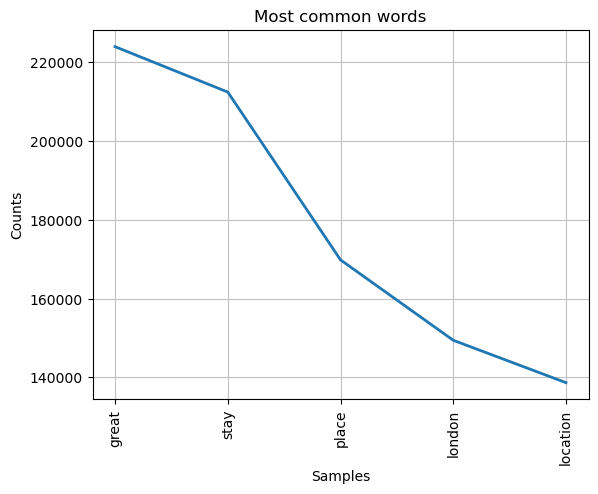

In [125]:
fdist.plot(5,title="Most common words",)
plt.show()

In [126]:
words = ''

# iterate through the text attribute in the dataframe splitting the text into the component tokens
for val in fdist :      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    words += " ".join(tokens)+" "

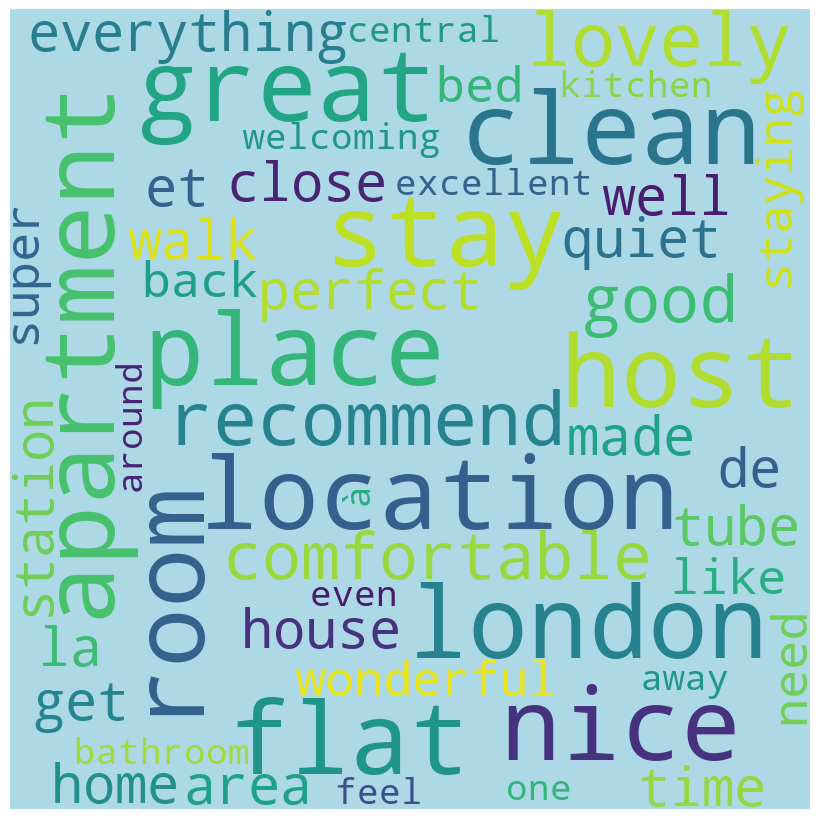

In [127]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='lightblue',
                stopwords = a,#We don't want to see stopwords in the word cloud
                min_font_size = 10,
                max_font_size=100, 
                max_words=50).generate(words)
                                             
                                              
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

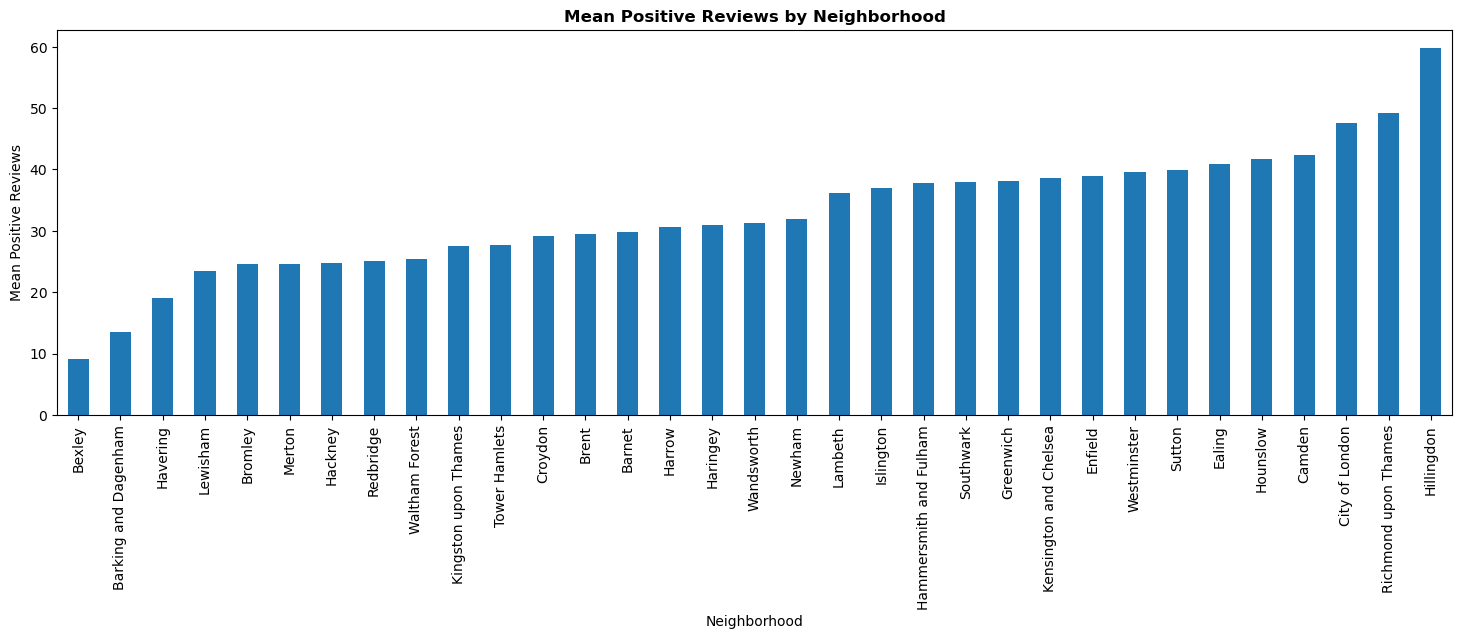

In [130]:
import matplotlib.pyplot as plt

# Calculate the mean positive reviews by neighborhood
mean_positive_reviews = cleaned_df.groupby('neighbourhood')['positive_comment'].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(18, 5))
mean_positive_reviews.plot(kind='bar')
plt.title('Mean Positive Reviews by Neighborhood', weight='bold')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Positive Reviews')
plt.xticks(rotation=90)
plt.show()


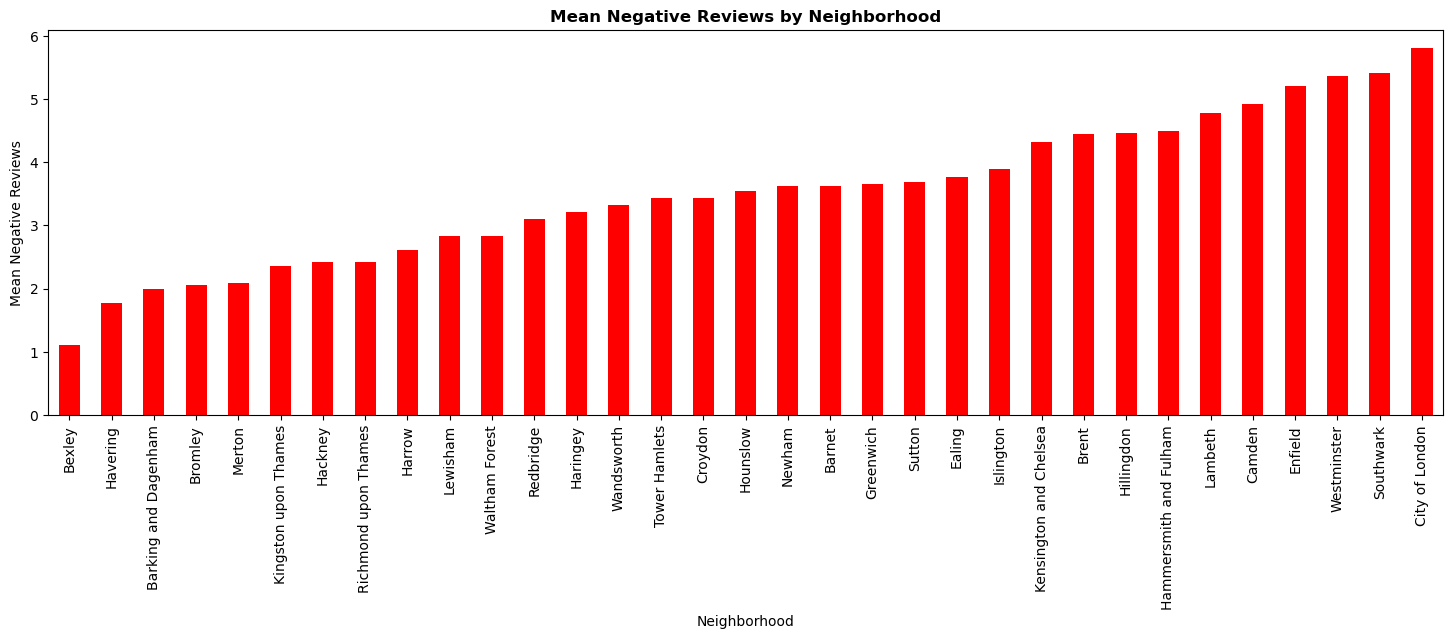

In [133]:
import matplotlib.pyplot as plt

# Calculate the mean negative reviews by neighborhood
mean_negative_reviews = cleaned_df.groupby('neighbourhood')['negative_comment'].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(18, 5))
mean_negative_reviews.plot(kind='bar', color='red')
plt.title('Mean Negative Reviews by Neighborhood', weight='bold')
plt.xlabel('Neighborhood')
plt.ylabel('Mean Negative Reviews')
plt.xticks(rotation=90)
plt.show()


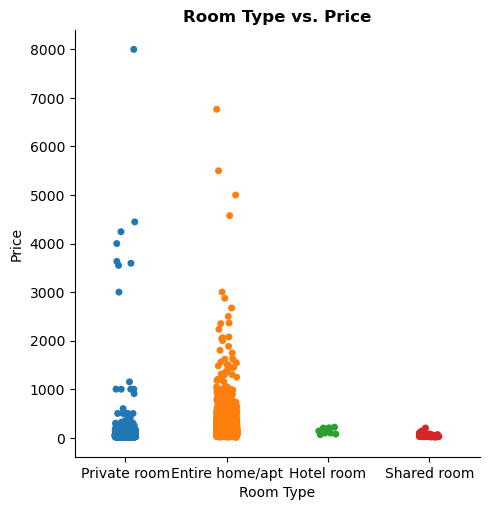

In [137]:
import seaborn as sns

# Create the categorical plot with separate colors for each room type
sns.catplot(x="room_type", y="price", hue="room_type", data=cleaned_df)

# Set the plot title and labels
plt.title('Room Type vs. Price', weight='bold')
plt.xlabel('Room Type')
plt.ylabel('Price')

# Show the plot
plt.show()
